<a href="https://colab.research.google.com/github/jitendra-121/cifar10/blob/main/cifar10_final(presentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description


### The CIFAR-10 dataset is a collection of 60,000 color images that is often used for machine learning and computer vision tasks:
### Image size: 32 x 32 pixels

###**Number of classes:** 10, including airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

###**Number of images per class**: 6,000, with 5,000 for training and 1,000 for testing

###**Origin**: A subset of the Tiny Images dataset, developed in 2009 to evaluate deep generative models

### **Purpose**: A benchmark for image classification and object recognition

# Hyper Parameters In CNN

Hyperparameters are like the settings or dials you adjust before you start training a machine learning model. They control things like how fast the model learns, how complex it is etc. You set them in advance, and they guide the model’s learning process, helping it perform well on the task.


> Here’s a  list of all key hyperparameters in a **CNN**

 1.	Convolutional Layer:

	•	**Number of Filters**: Determines the number of feature detectors.

	•	**Filter Size**: Dimensions of the filter (e.g., 3x3).

	•	**Stride**: Controls how much the filter moves.

	•	**Padding**: Adds extra pixels around input to control output size.


2.	Pooling Layer:

	•	**Pool Size**: Size of the pooling window (e.g., 2x2).
  
	•	**Stride**: Step size of the pooling operation.

	•	**Type of Pooling**: Max or average pooling.

3. Fully Connected Layer Hyperparameters

	• **Number of Units (Neurons)**: Specifies how many neurons are in each fully connected layer.
  

4. Activation Function Hyperparameters

	•	**Type of Activation Function:** Common options include:

	•	**ReLU (Rectified Linear Unit)**: Most commonly used in CNNs to introduce non-linearity.

	• **Leaky ReLU, ELU, GELU, or SELU**: Variants of ReLU for different behavior with negative inputs.

	•	**Sigmoid or Tanh**: Typically used in the output layer for binary classification or multi-class classification with a probability interpretation.


5. Regularization Hyperparameters

	•	**Dropout Rate:** The probability of dropping a neuron during training to prevent overfitting. A common value is 0.5.

	•	**L2 or L1 Regularization**: Adds a penalty to the loss function based on the magnitude of the weights, helping to reduce overfitting.

	•**Batch Normalization**: A layer that normalizes the input to the next layer, accelerating convergence and stabilizing training.

  

6.	Optimization:

	•	**Learning Rate**: Speed of weight updates.
  
	•	**Optimizer**: SGD, Adam, RMSprop, etc.

	• **Momentum**: Accelerates gradient descent.

	•	**Learning Rate Scheduler**: Adjusts learning rate over time.


7. Training Hyperparameters

	• **Batch Size**: The number of samples processed before the model’s weights are updated. Common values are powers of 2 (e.g., 32, 64, 128).

	•	**Epochs**: The number of complete passes through the entire training dataset.

	•	**Early Stopping**: A strategy to stop training once the model’s performance on the validation set stops improving.

  


  8.	Data Augmentation:

	•	**Transformations**: Rotation, flipping, zoom, etc.



  9.	Weight Initialization:

	• **Method**:

      1.   Xavier.
      2.   He.
      3.   Random Initializer.






# Source code


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
# 2. Define CNN model architecture with hyperparameters including weight initialization and batch normalization
model = models.Sequential()

# Layer 1: Convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, He initialization
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal(), input_shape=(32, 32, 3)))

# Batch Normalization after the convolutional layer
model.add(layers.BatchNormalization())

# Layer 2: Convolutional layer with 32 filters, 3x3 kernel size, He initialization
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# MaxPooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Layer 3: Convolutional layer with 64 filters, 3x3 kernel size, He initialization
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# Layer 4: Convolutional layer with 64 filters, 3x3 kernel size, He initialization
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                        kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# MaxPooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 512 units, ReLU activation, He initialization, and L2 regularization
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                       kernel_initializer=initializers.HeNormal()))

# Batch Normalization
model.add(layers.BatchNormalization())

# Dropout for regularization
model.add(layers.Dropout(0.5))

# Output layer with 10 units for 10 classes and softmax activation
model.add(layers.Dense(10, activation='softmax', kernel_initializer=initializers.GlorotUniform()))

# 3. Compile the model with learning rate schedule
initial_lr = 0.001
optimizer = optimizers.Adam(learning_rate=initial_lr)

# Learning rate schedule: Reduce LR on plateau
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# HeNormal() ensures the initial weights of your convolutional layer are drawn from a
# normal distribution with variance scaled appropriately for ReLU activations.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
# 4. Data augmentation to avoid overfitting
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Fit the data generator on the training data
datagen.fit(x_train)

# 5. Train the model with augmented data
batch_size = 64
epochs = 100

# Apply early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Combine callbacks
callbacks = [early_stopping, lr_schedule]

In [ ]:

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Summary of the model
model.summary()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.3808 - loss: 2.9969 - val_accuracy: 0.4927 - val_loss: 2.2043 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5640 - loss: 1.7987 - val_accuracy: 0.6170 - val_loss: 1.6129 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.6134 - loss: 1.5362 - val_accuracy: 0.6303 - val_loss: 1.5594 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6447 - loss: 1.4752 - val_accuracy: 0.6162 - val_loss: 1.6652 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.6619 - loss: 1.4812 - val_accuracy: 0.6858 - val_loss: 1.4665 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6788 - loss: 1.4447 - val_accuracy: 0.7155 - val_loss: 1.3956 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.7006 - loss: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,510,720 (24.84 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 4,339,542 (16.55 MB)

In [ ]:
y_pred=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       0.93      0.95      0.94      1000
           2       0.81      0.77      0.79      1000
           3       0.80      0.64      0.71      1000
           4       0.85      0.80      0.82      1000
           5       0.85      0.73      0.78      1000
           6       0.70      0.96      0.81      1000
           7       0.87      0.90      0.89      1000
           8       0.92      0.93      0.92      1000
           9       0.89      0.94      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



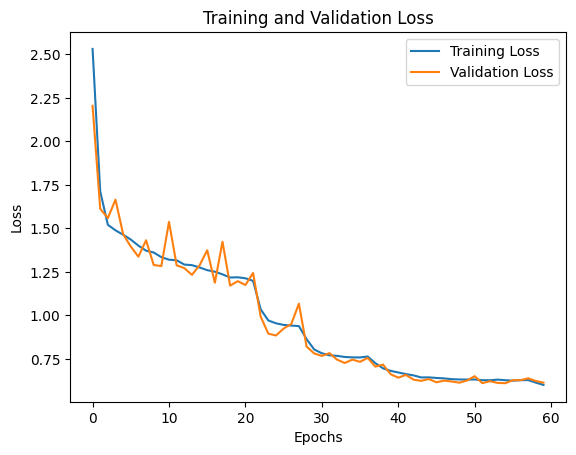

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend
plt.legend()

# Display the plot
plt.show()

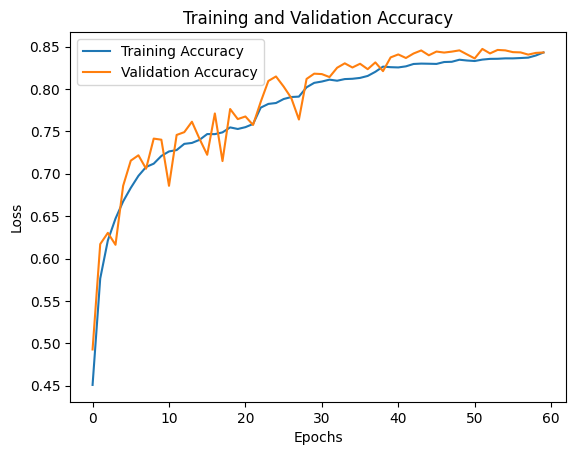

In [ ]:


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

# Model Architectue

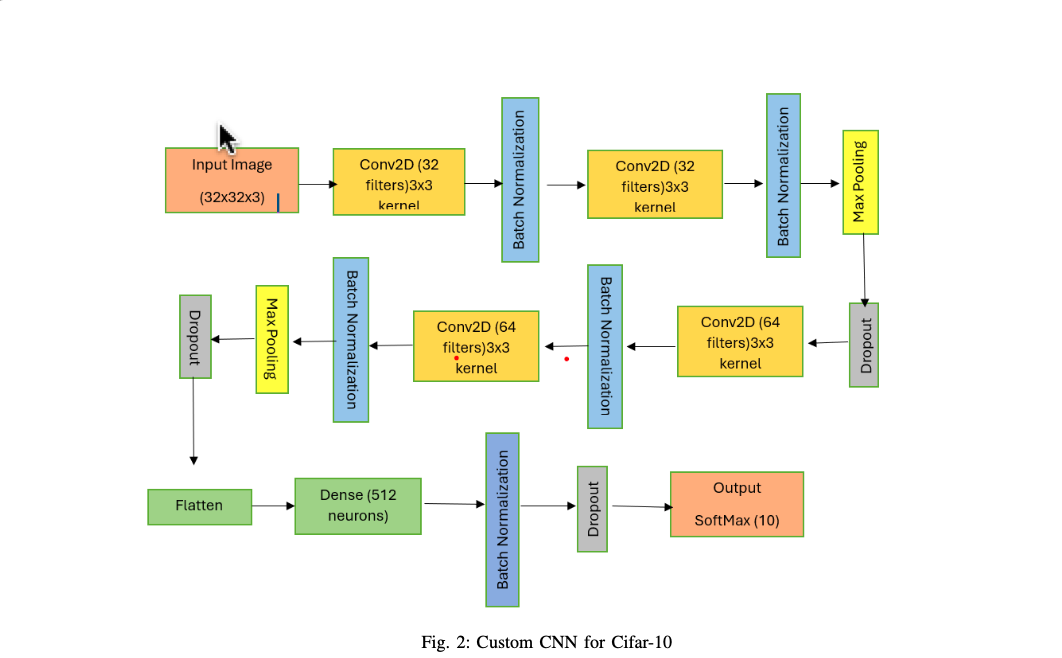

# List Of HyperParameters Used






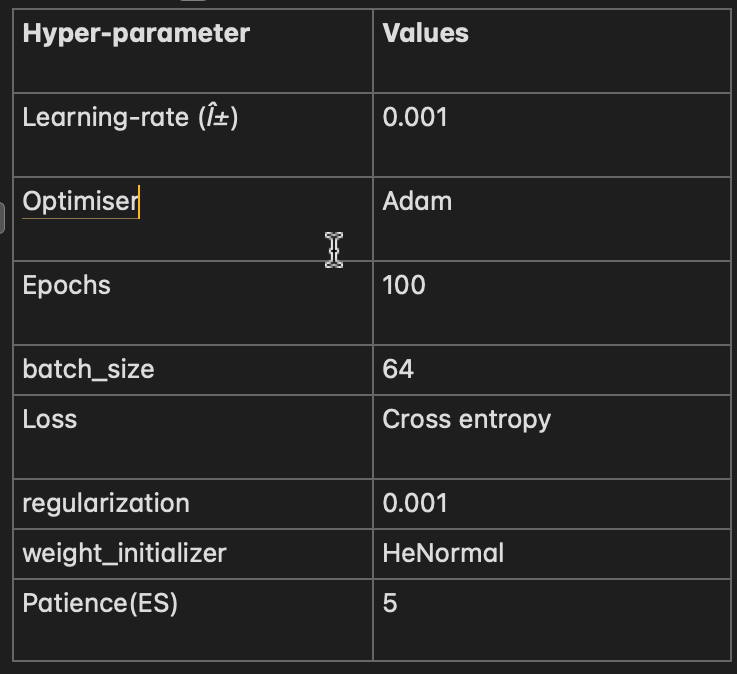




# Visualizing Things In CNN

In [ ]:
test_image=x_test[0]

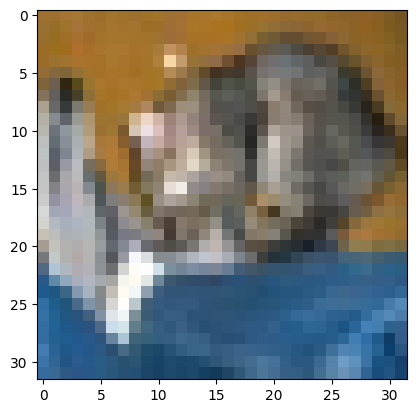

In [ ]:
plt.imshow(test_image)
plt.show()

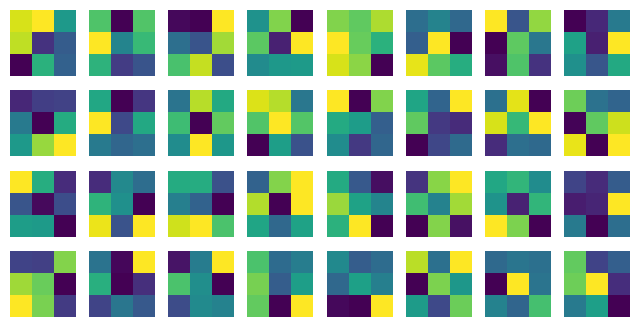

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize filters of a convolutional layer
def visualize_filters(layer_name):
    # Get the layer
    layer = model.get_layer(name=layer_name)

    # Extract the filters (weights) and biases from the layer
    filters, biases = layer.get_weights()

    # Normalize filter values to 0 to 1 for better visualization
    f_min, f_max = np.min(filters), np.max(filters)
    filters = (filters - f_min) / (f_max - f_min)

    # Plotting the filters (only the first channel for RGB filters)
    n_filters = filters.shape[-1]  # Number of filters in the layer
    n_columns = 8  # Number of columns for displaying filters
    n_rows = n_filters // n_columns  # Number of rows for displaying filters

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns, n_rows))

    for i in range(n_filters):
        ax = axes[i // n_columns, i % n_columns]
        # Select the first channel of the filter for visualization (for RGB)
        ax.imshow(filters[:, :, 0, i], cmap='viridis')
        ax.axis('off')

    plt.show()

# Example usage: Visualize filters of the first Conv2D layer
visualize_filters('conv2d')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


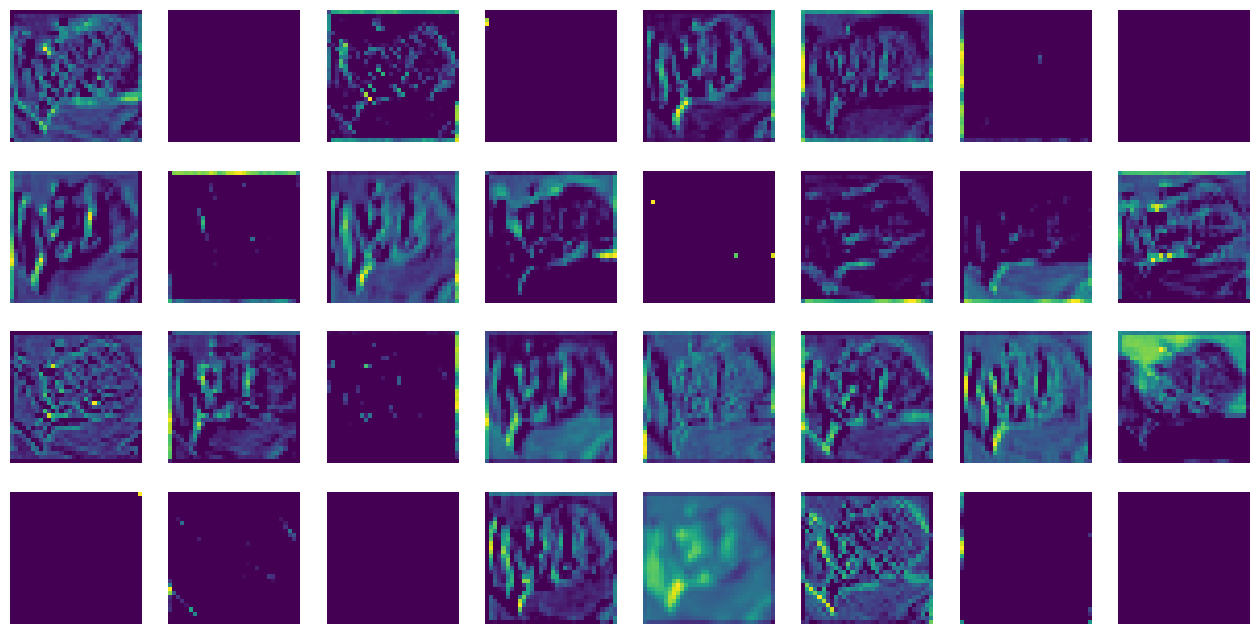

In [ ]:
from tensorflow.keras.models import Model

# Function to visualize feature maps of a specific convolutional layer
def visualize_feature_maps(layer_name, input_image):
    # Create a model that outputs the feature maps from the specified layer
    intermediate_model = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)

    # Get the feature maps for the input image
    feature_maps = intermediate_model.predict(np.expand_dims(input_image, axis=0))

    # Get the number of feature maps
    n_feature_maps = feature_maps.shape[-1]

    # Define number of columns for plotting
    n_columns = 8
    n_rows = n_feature_maps // n_columns

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 2, n_rows * 2))

    for i in range(n_feature_maps):
        ax = axes[i // n_columns, i % n_columns]
        ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.show()

# Example usage: Visualize feature maps for the first Conv2D layer after passing a test image
test_image = x_test[0]  # Use a sample test image (or any image)
visualize_feature_maps('conv2d', test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Layer Name: conv2d — Feature Map Size: (1, 32, 32, 32)


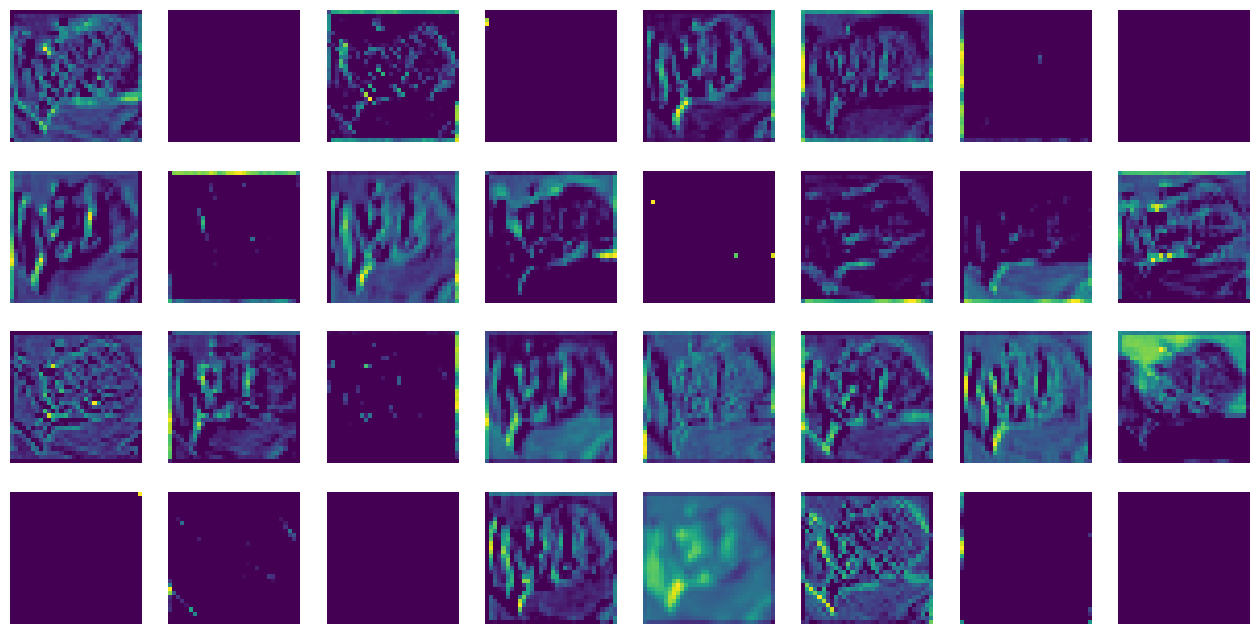

Layer Name: batch_normalization — Feature Map Size: (1, 32, 32, 32)


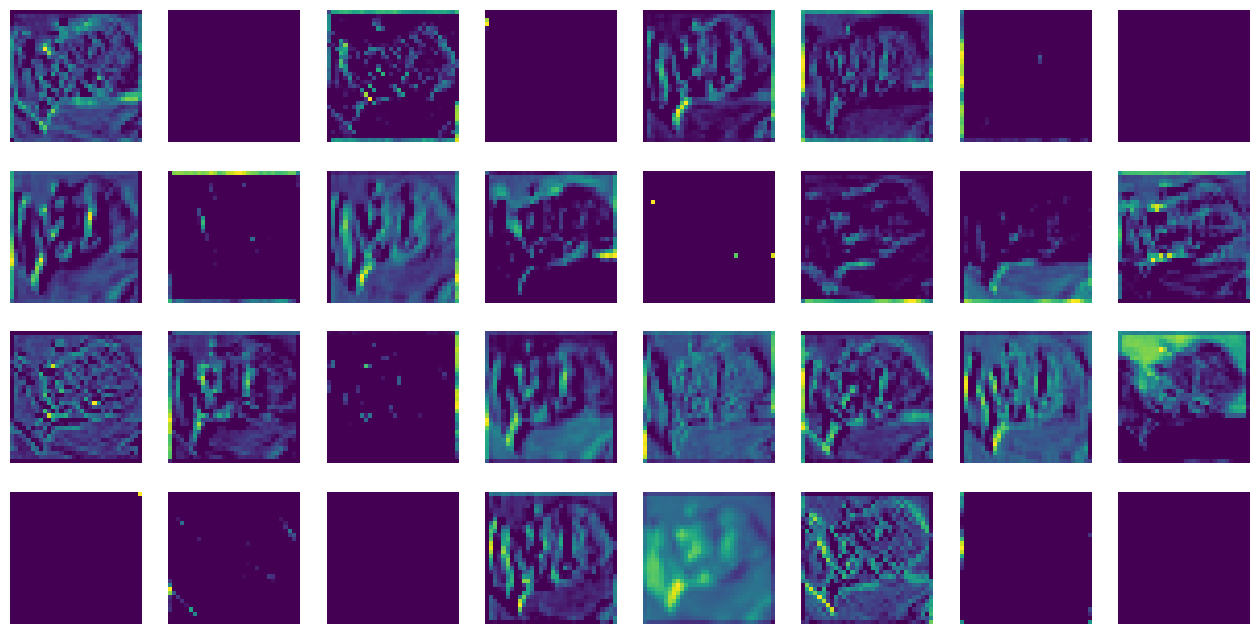

Layer Name: conv2d_1 — Feature Map Size: (1, 32, 32, 32)


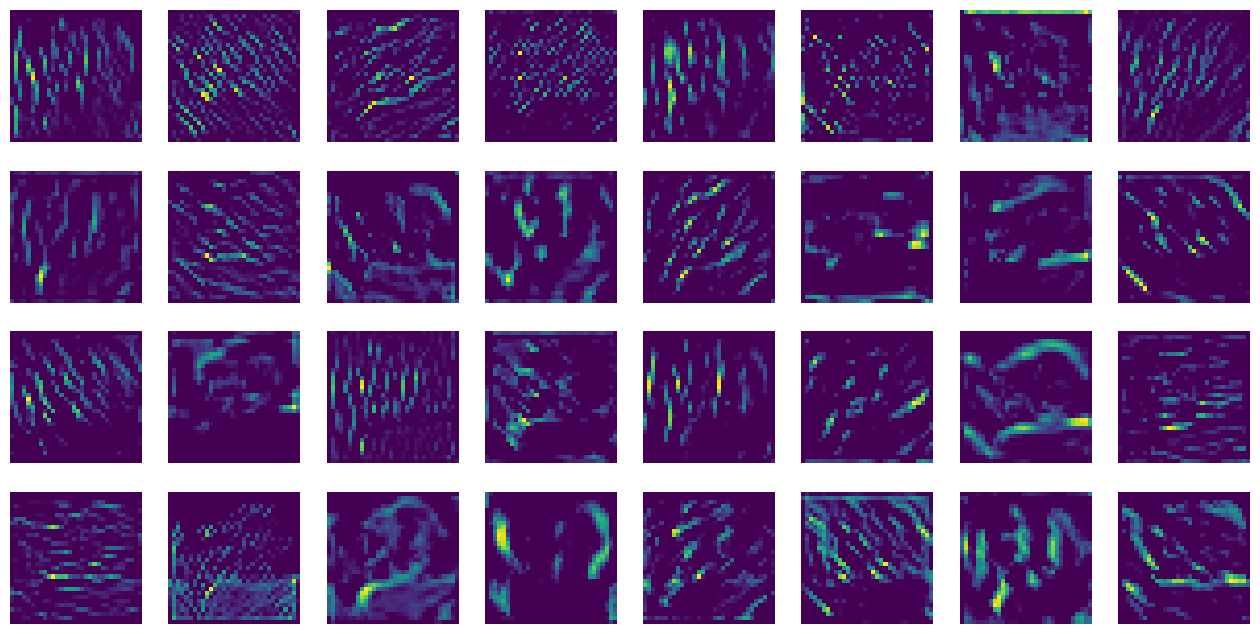

Layer Name: batch_normalization_1 — Feature Map Size: (1, 32, 32, 32)


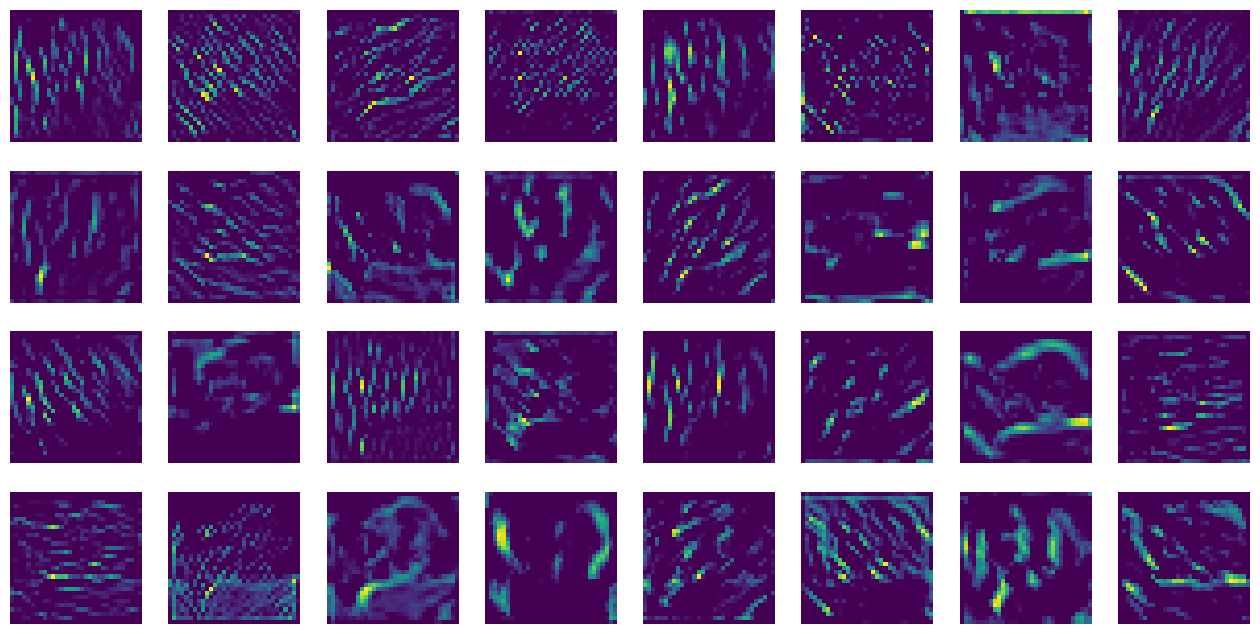

Layer Name: max_pooling2d — Feature Map Size: (1, 16, 16, 32)


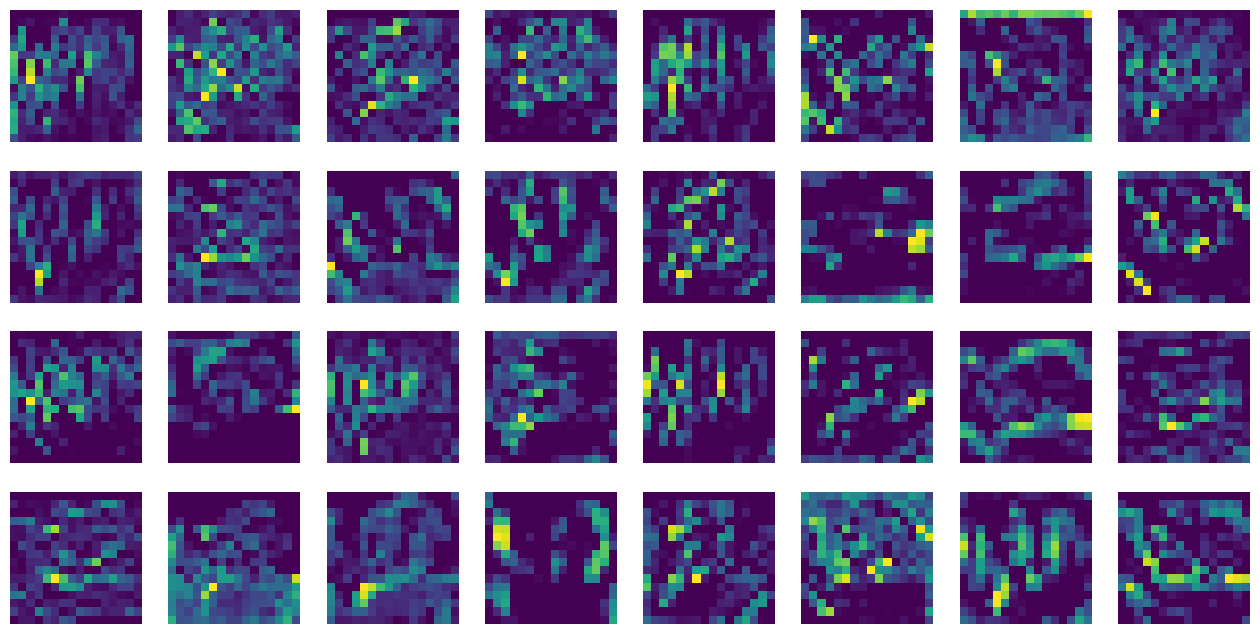

Layer Name: dropout — Feature Map Size: (1, 16, 16, 32)


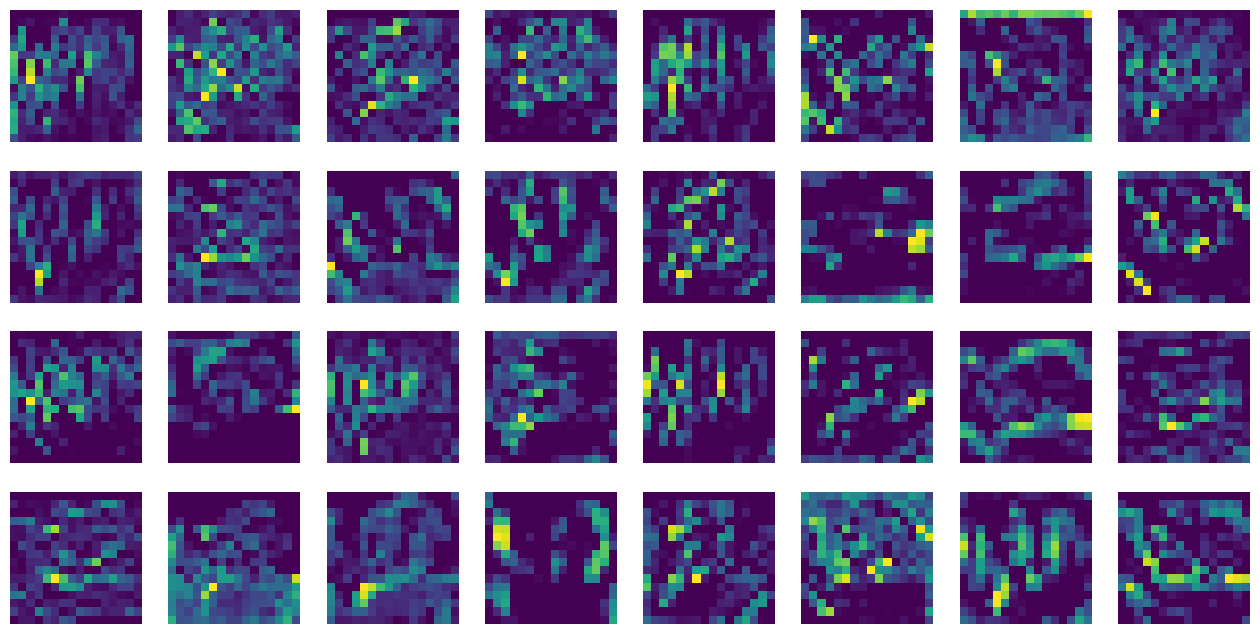

Layer Name: conv2d_2 — Feature Map Size: (1, 16, 16, 64)


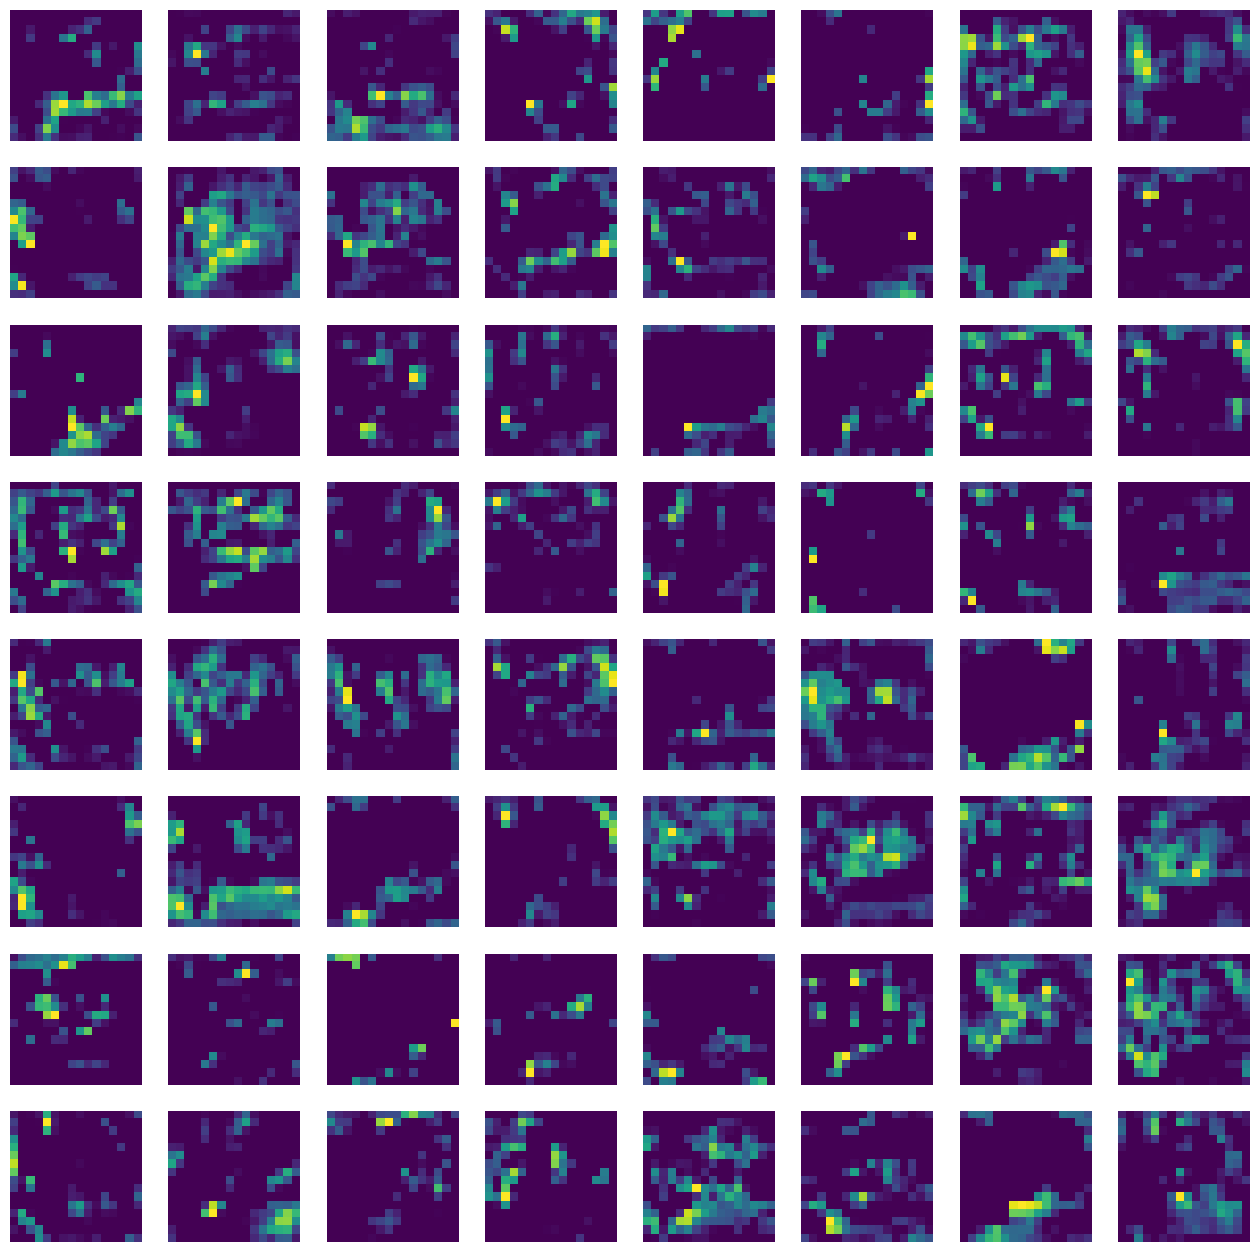

Layer Name: batch_normalization_2 — Feature Map Size: (1, 16, 16, 64)


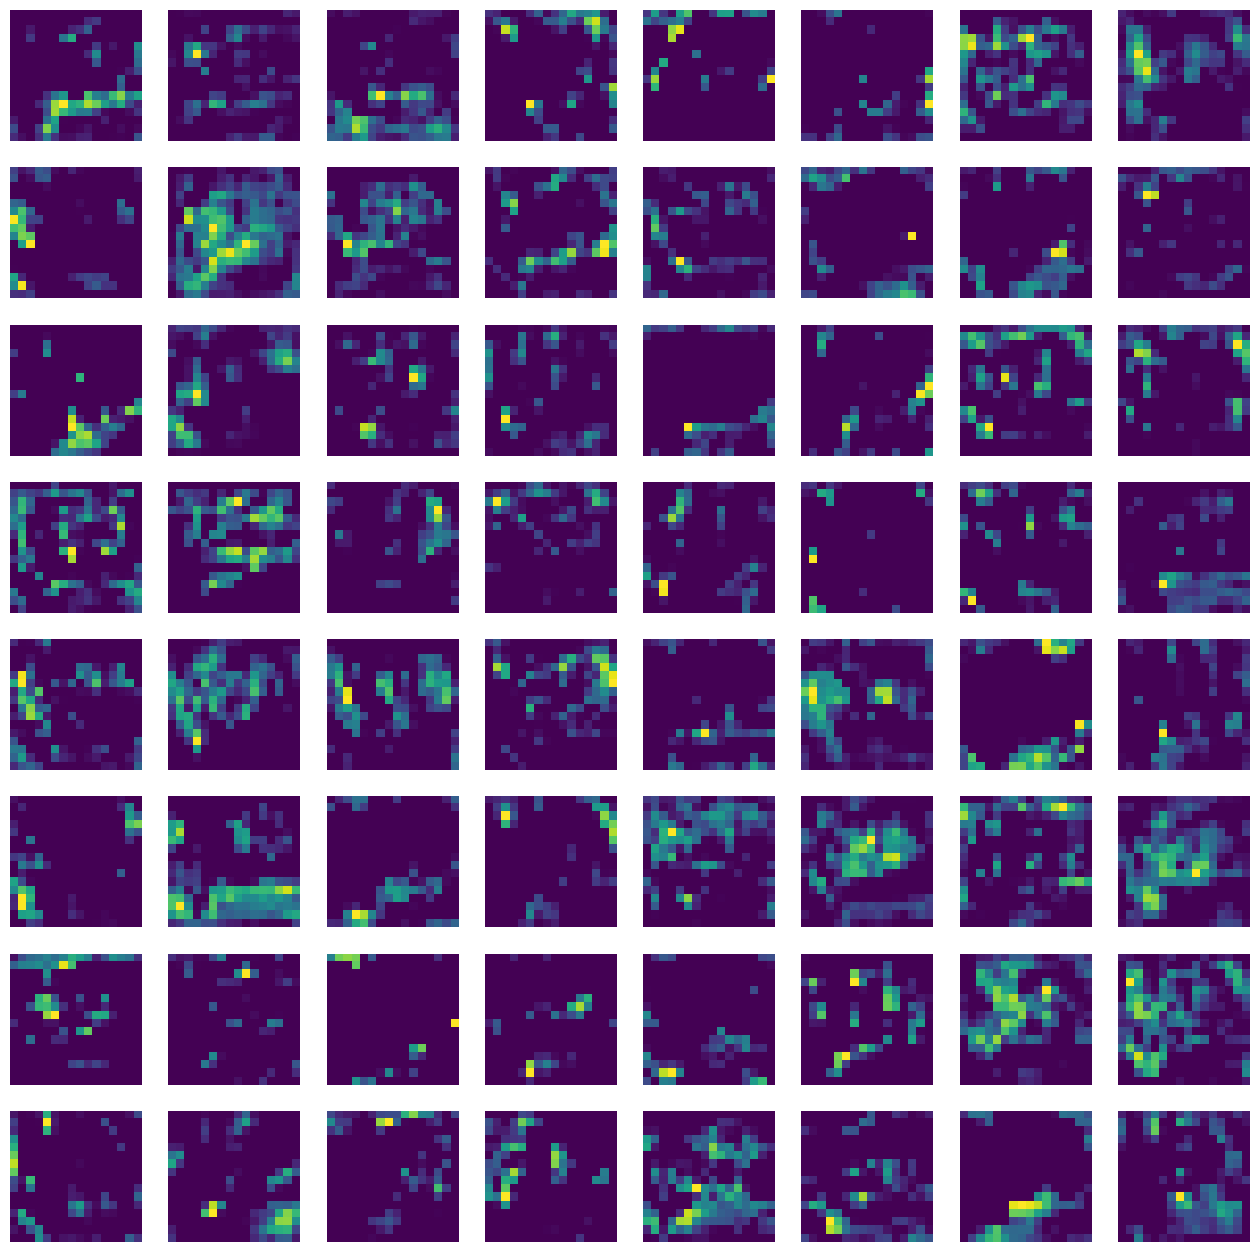

Layer Name: conv2d_3 — Feature Map Size: (1, 16, 16, 64)


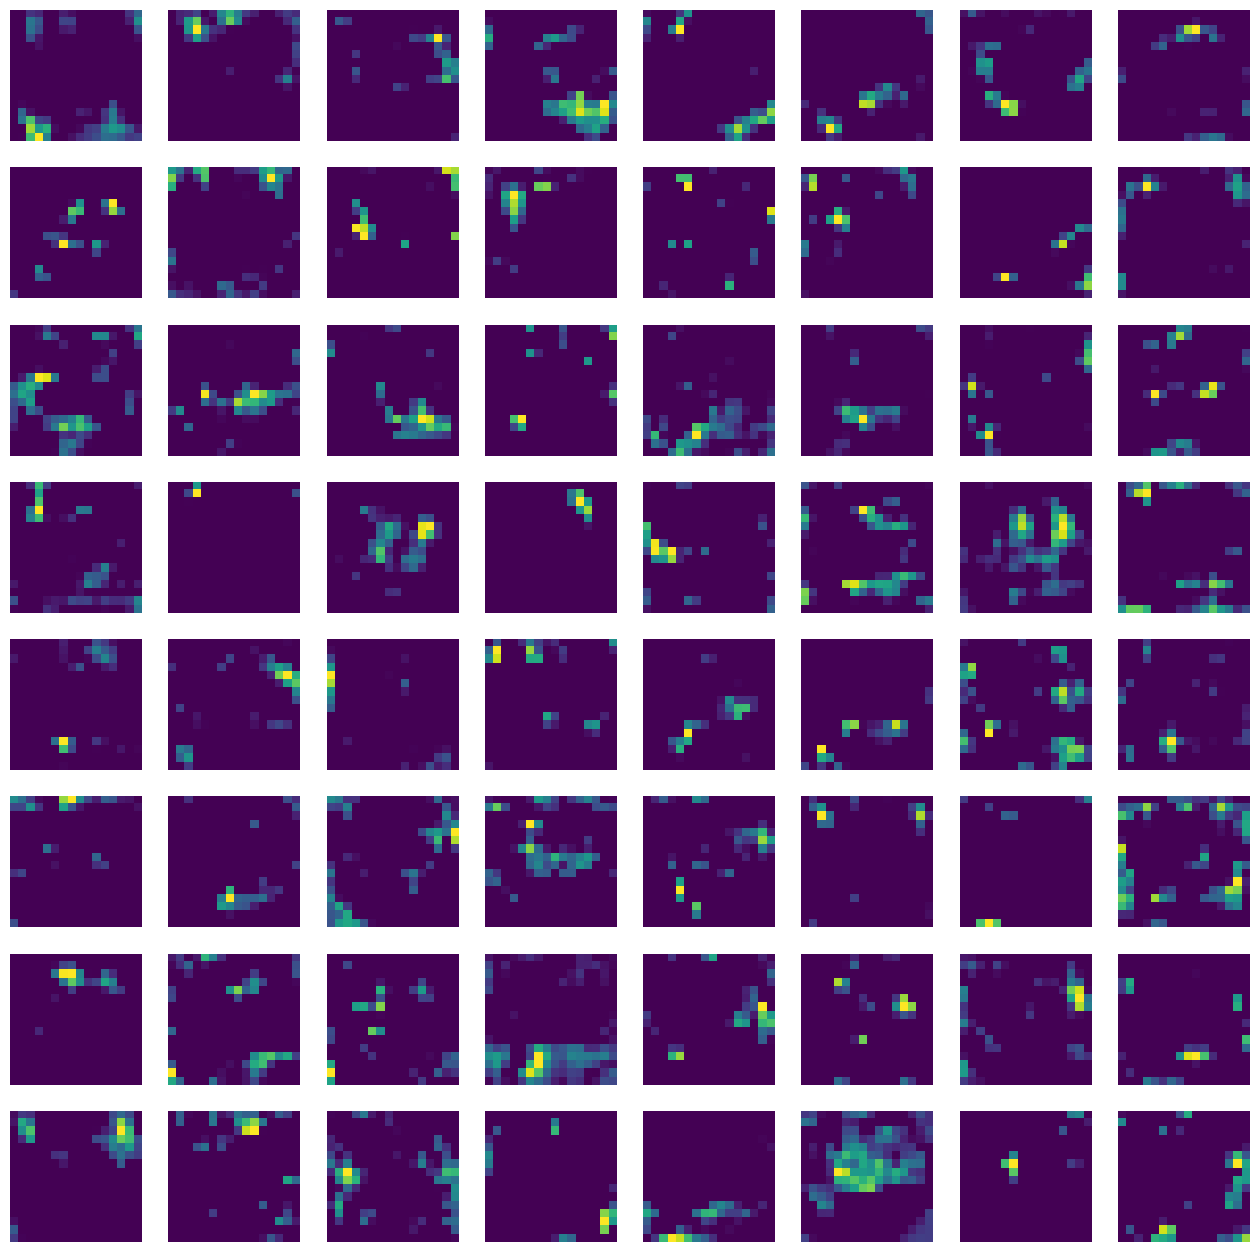

Layer Name: batch_normalization_3 — Feature Map Size: (1, 16, 16, 64)


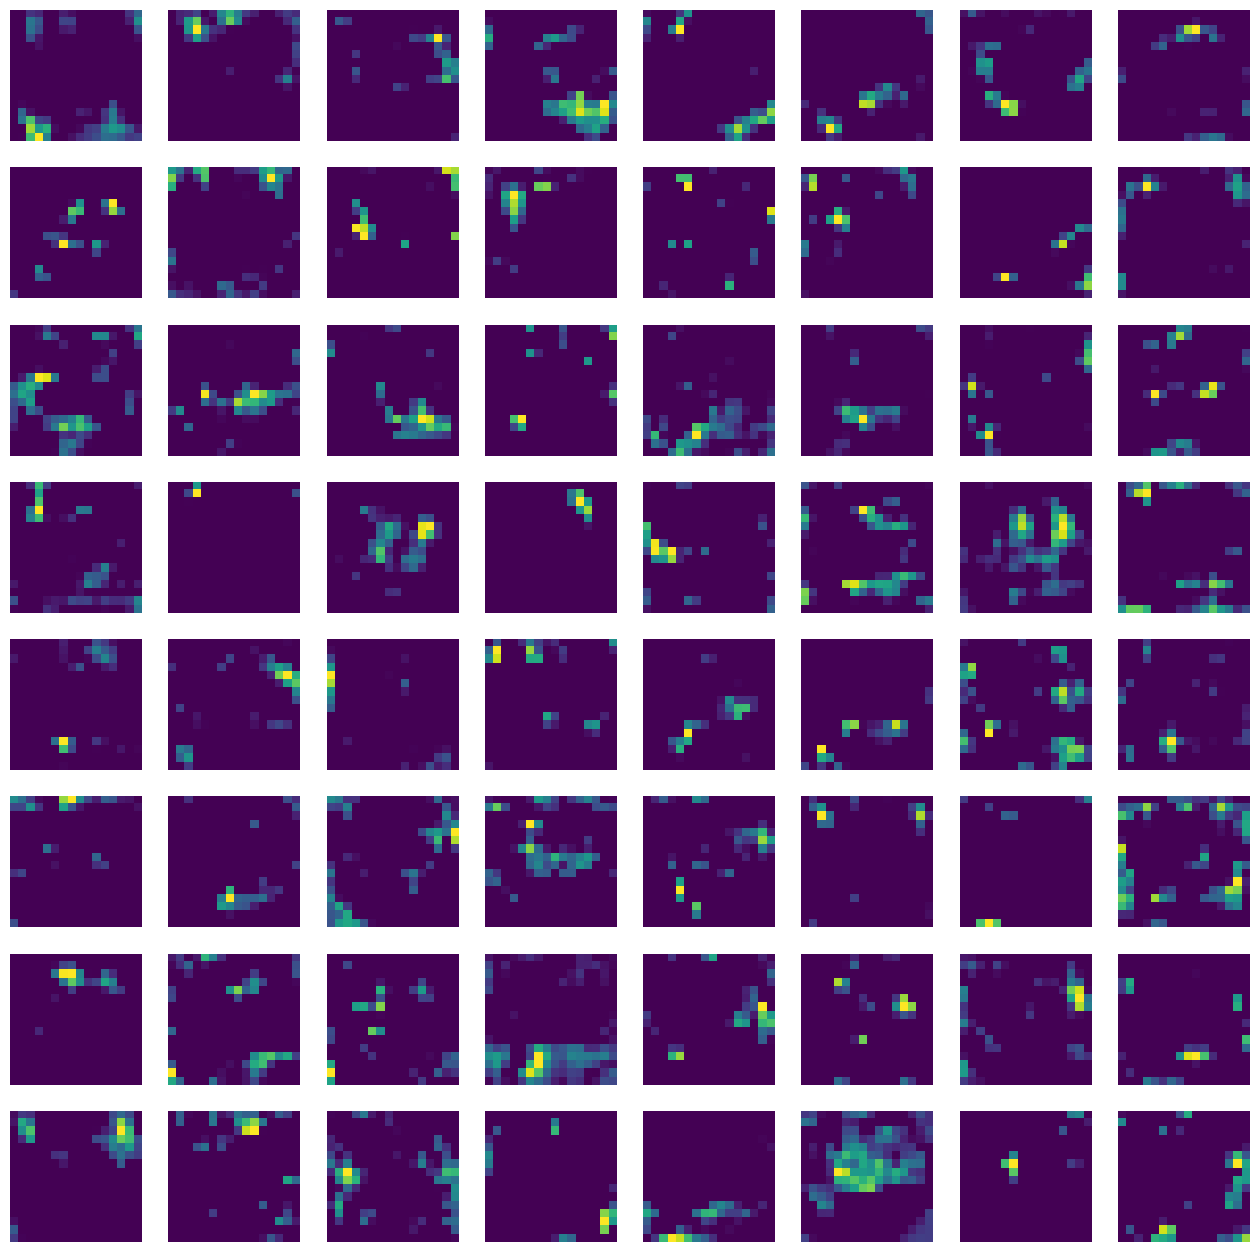

Layer Name: max_pooling2d_1 — Feature Map Size: (1, 8, 8, 64)


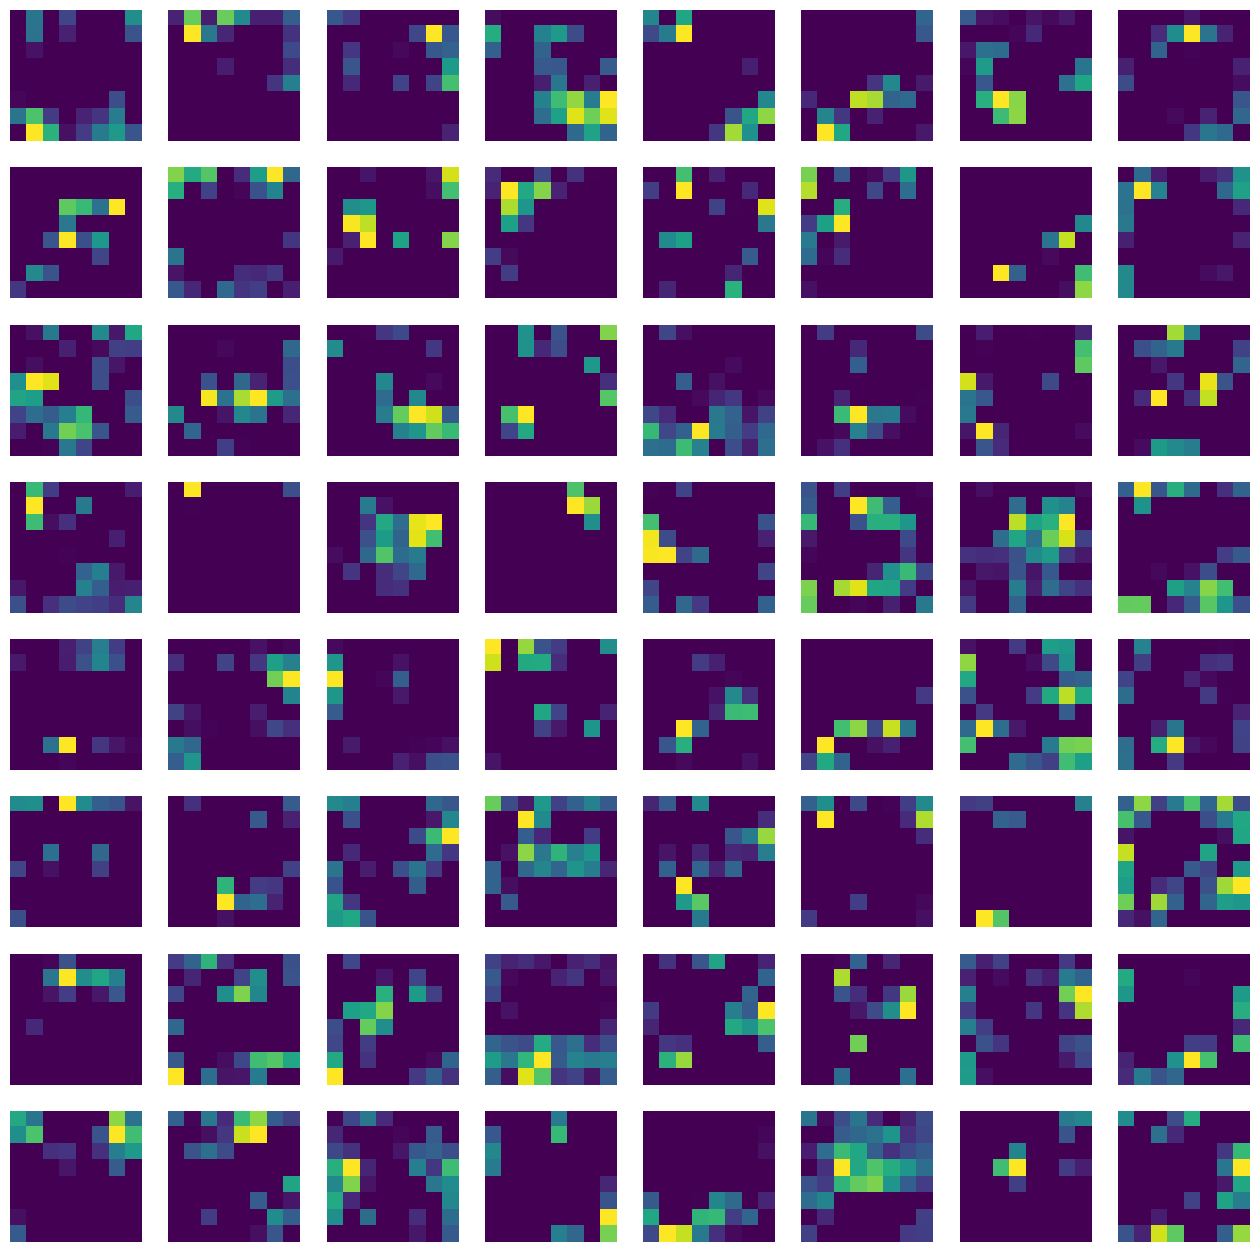

Layer Name: dropout_1 — Feature Map Size: (1, 8, 8, 64)


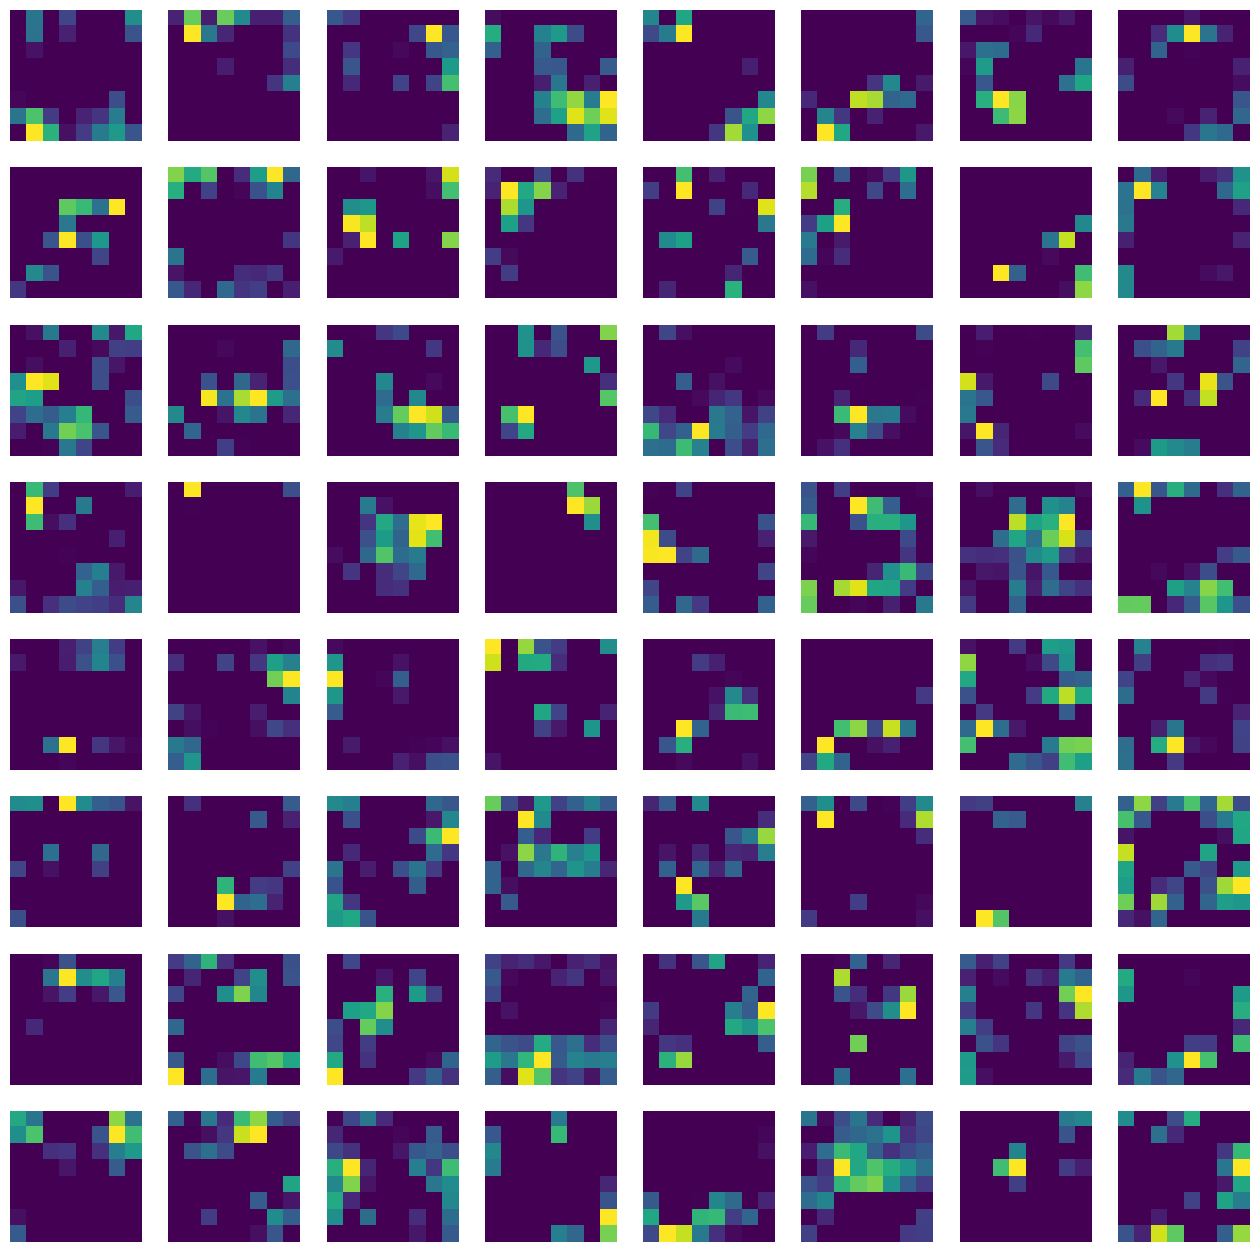

Layer Name: flatten — Feature Map Size: (1, 4096)


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

Error in callback <function _draw_all_if_interactive at 0x7c4ec8550ee0> (for post_execute):


ValueError: Image size of 1600x102400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1600x102400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x102400 with 4096 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to visualize feature maps at every layer for a given image
def visualize_all_feature_maps(input_image):
    # Create a model that outputs the feature maps for every layer
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'dense' not in layer.name]
    intermediate_model = Model(inputs=model.inputs, outputs=layer_outputs)

    # Get the feature maps for the input image
    feature_maps = intermediate_model.predict(np.expand_dims(input_image, axis=0))

    for layer_name, feature_map in zip([layer.name for layer in model.layers if 'conv' in layer.name or 'dense' not in layer.name], feature_maps):
        n_feature_maps = feature_map.shape[-1]  # Number of feature maps
        size = feature_map.shape[1]  # Size of the feature map

        # Define number of columns and rows for plotting
        n_columns = 8  # Number of columns for display
        n_rows = n_feature_maps // n_columns  # Number of rows

        # Plotting the feature maps
        print(f"Layer Name: {layer_name} — Feature Map Size: {feature_map.shape}")
        fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 2, n_rows * 2))

        # Loop through each feature map in the current layer
        for i in range(n_feature_maps):
            ax = axes[i // n_columns, i % n_columns]
            ax.imshow(feature_map[0, :, :, i], cmap='viridis')
            ax.axis('off')

        plt.show()

# Example usage: Visualize feature maps for every convolutional layer
test_image = x_test[0]  # Use a sample test image (or any image)
visualize_all_feature_maps(test_image)

# Visualizing a custom image

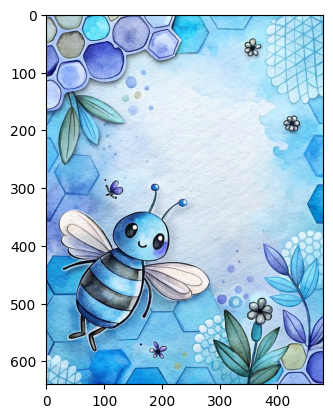

In [ ]:
import cv2

# Load an image
image = cv2.imread('/content/bee-8790316_640.jpg')

# Resize the image to specific dimensions (width, height)
resized_image = cv2.resize(image, (32, 32))  # Resize to 100x100 pixels

# Display the original and resized image
plt.imshow(image)

# cv2.waitKey(0)  # Wait for a key press to close the window
# cv2.destroyAllWindows()

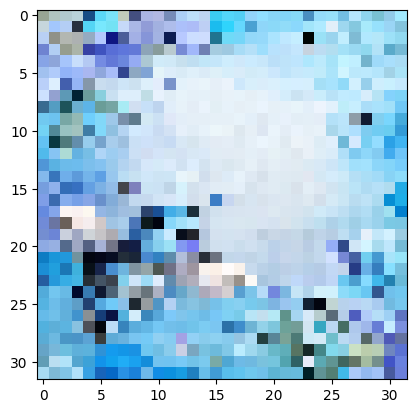

In [ ]:
plt.imshow(resized_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


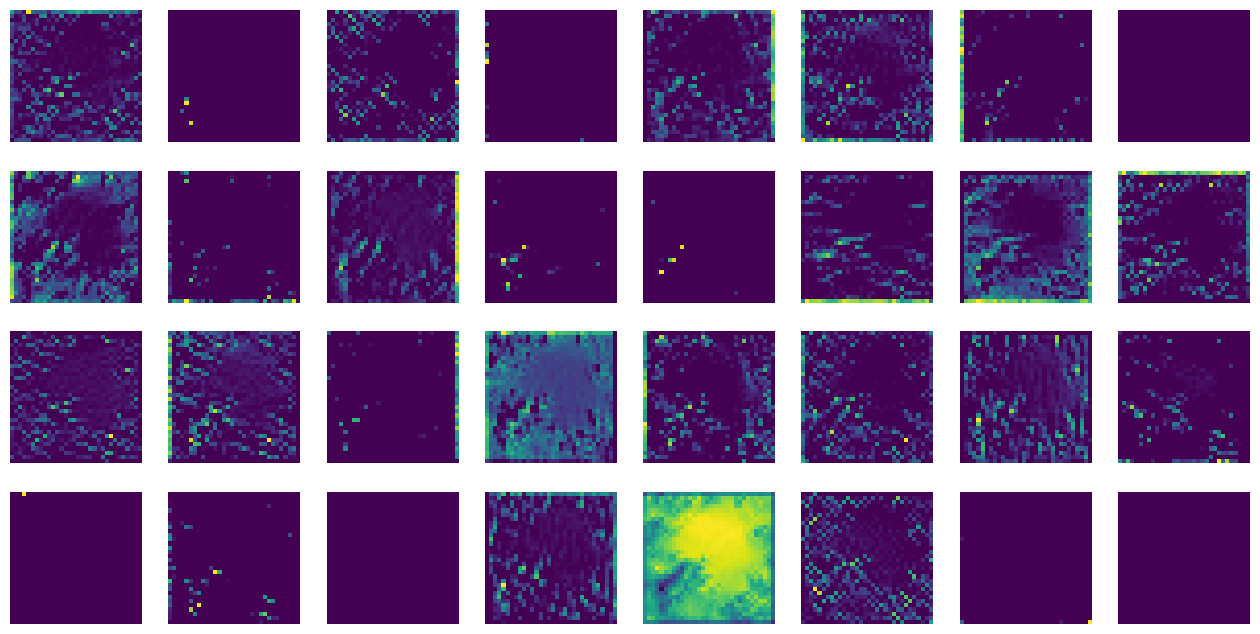

In [ ]:
from tensorflow.keras.models import Model

# Function to visualize feature maps of a specific convolutional layer
def visualize_feature_maps(layer_name, input_image):
    # Create a model that outputs the feature maps from the specified layer
    intermediate_model = Model(inputs=model.inputs, outputs=model.get_layer(layer_name).output)

    # Get the feature maps for the input image
    feature_maps = intermediate_model.predict(np.expand_dims(input_image, axis=0))

    # Get the number of feature maps
    n_feature_maps = feature_maps.shape[-1]

    # Define number of columns for plotting
    n_columns = 8
    n_rows = n_feature_maps // n_columns

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 2, n_rows * 2))

    for i in range(n_feature_maps):
        ax = axes[i // n_columns, i % n_columns]
        ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.show()

# Example usage: Visualize feature maps for the first Conv2D layer after passing a test image
test_image =resized_image  # Use a sample test image (or any image)
visualize_feature_maps('conv2d', test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Layer Name: conv2d — Feature Map Size: (1, 32, 32, 32)


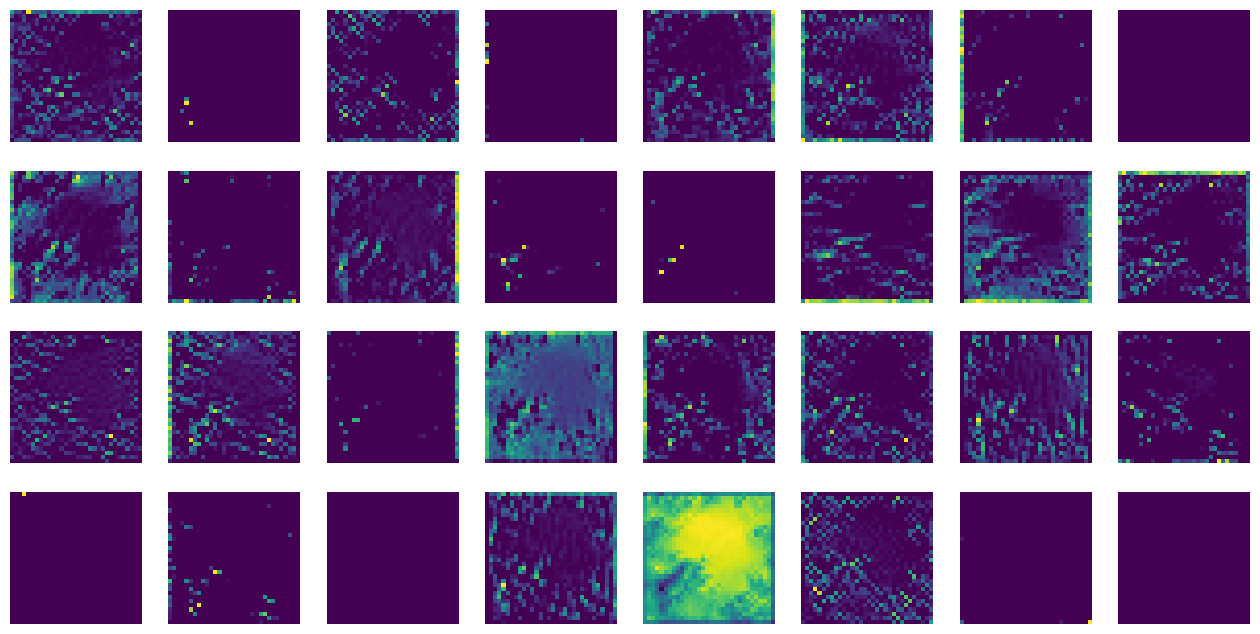

Layer Name: batch_normalization — Feature Map Size: (1, 32, 32, 32)


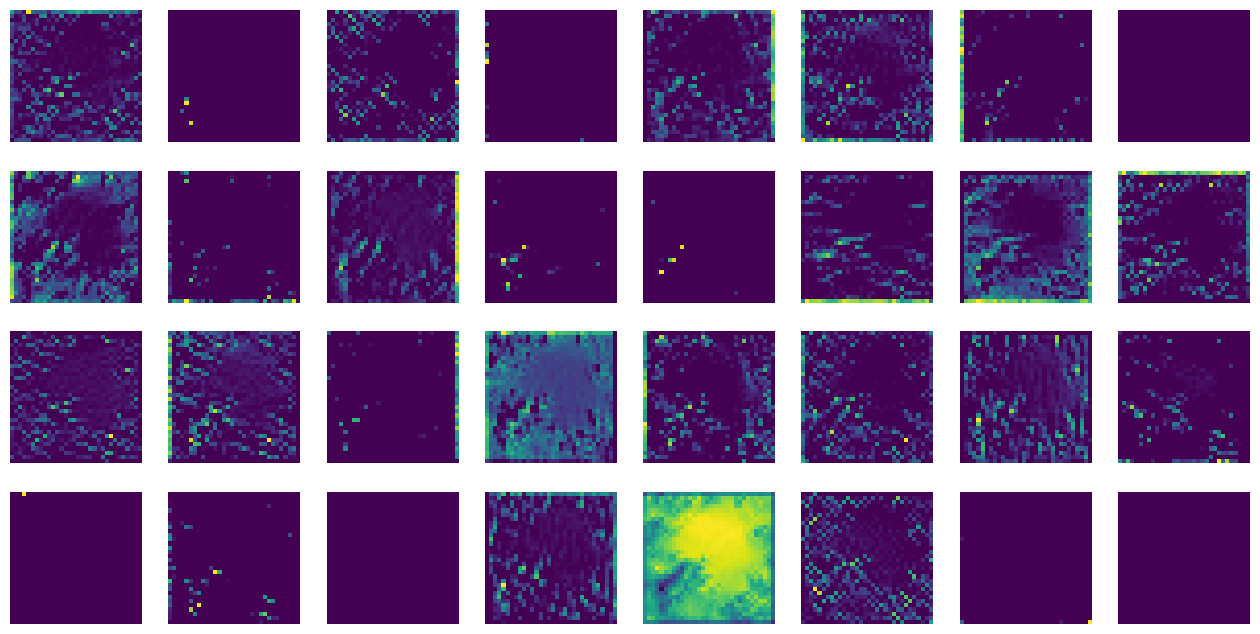

Layer Name: conv2d_1 — Feature Map Size: (1, 32, 32, 32)


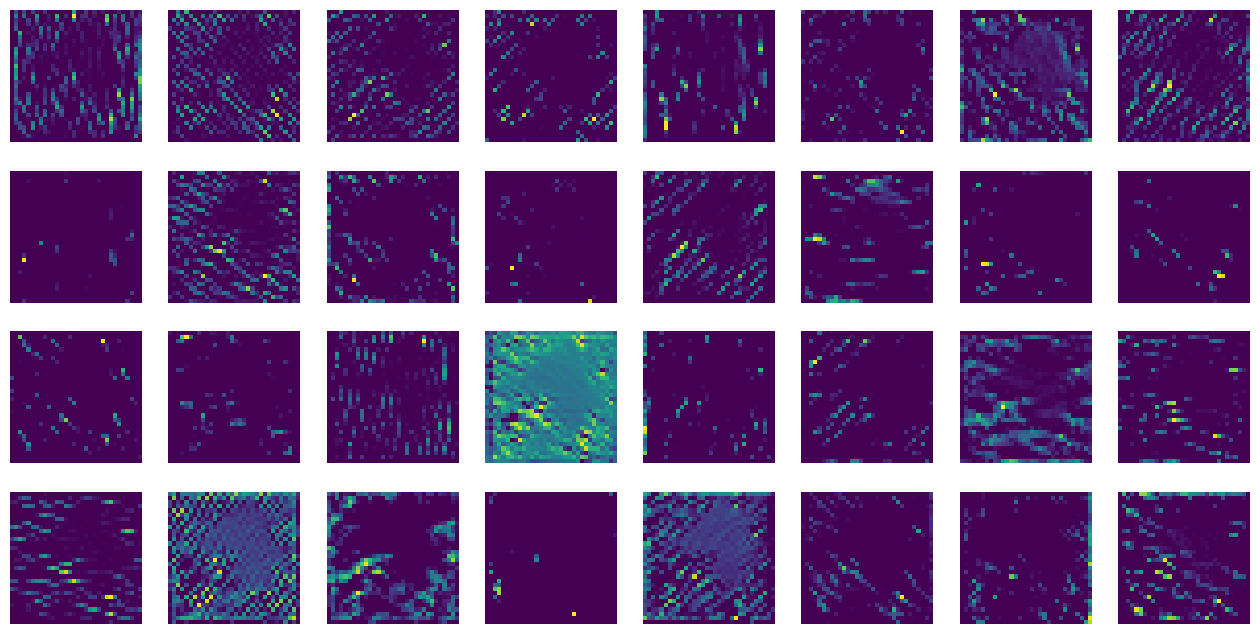

Layer Name: batch_normalization_1 — Feature Map Size: (1, 32, 32, 32)


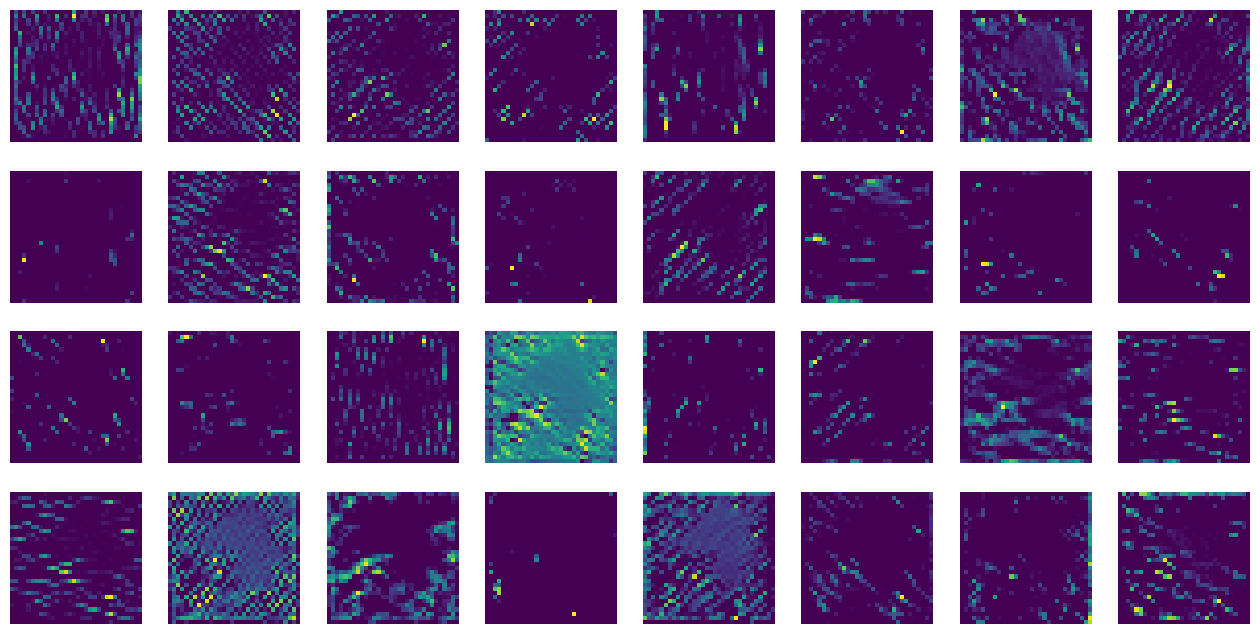

Layer Name: max_pooling2d — Feature Map Size: (1, 16, 16, 32)


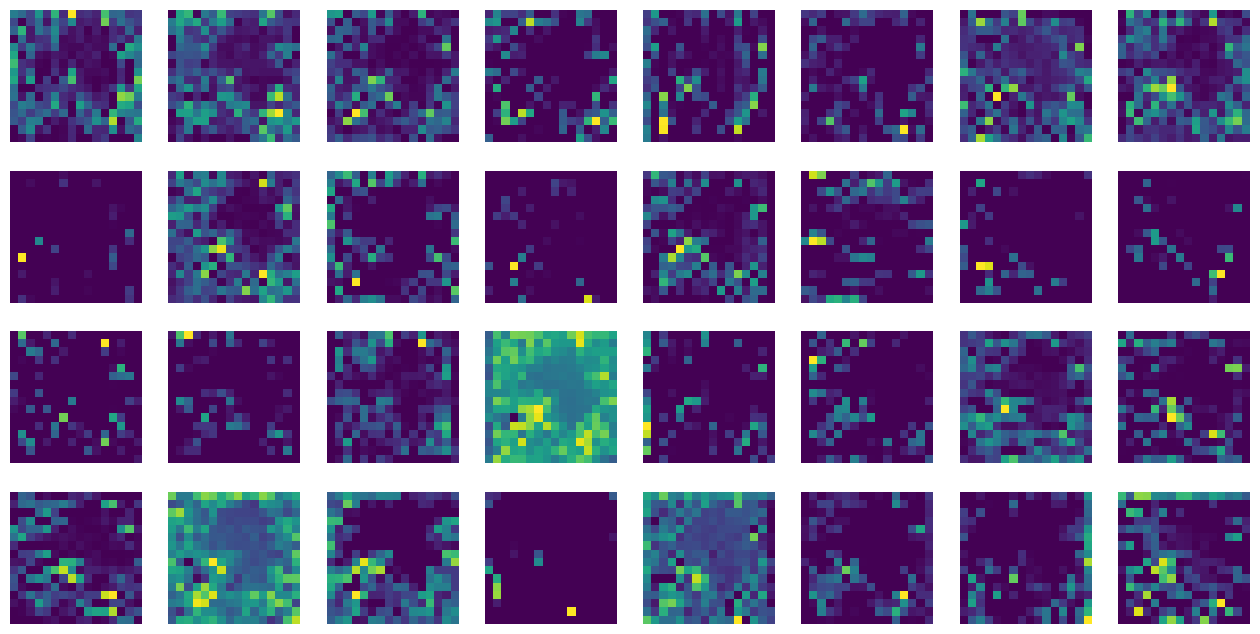

Layer Name: dropout — Feature Map Size: (1, 16, 16, 32)


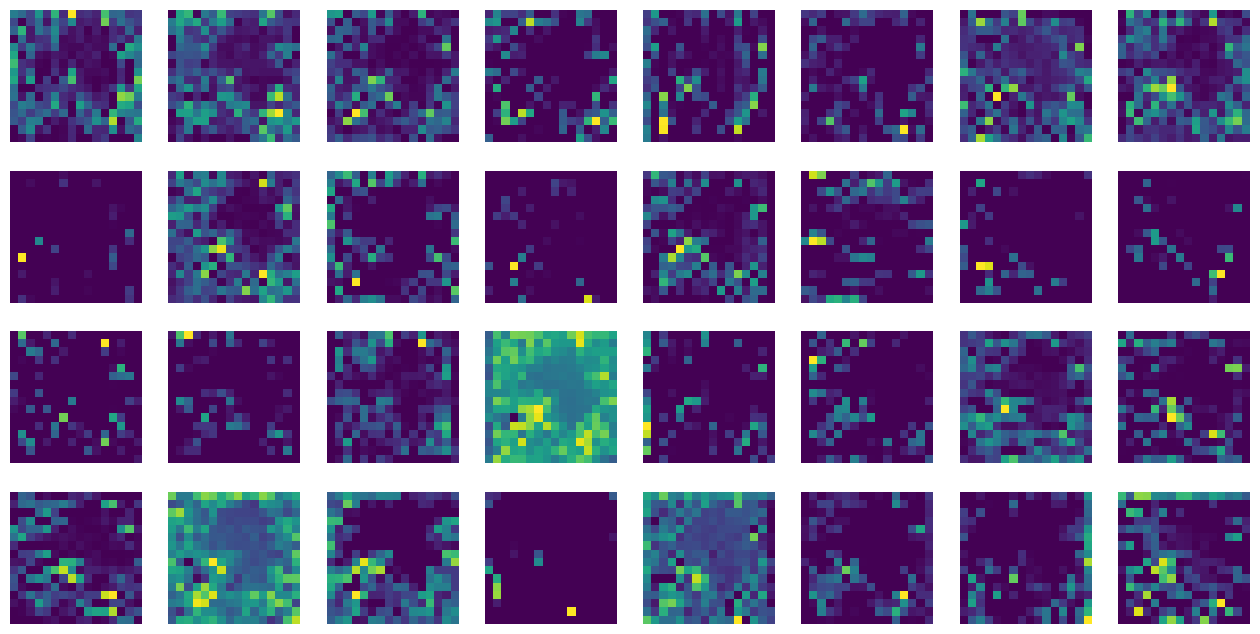

Layer Name: conv2d_2 — Feature Map Size: (1, 16, 16, 64)


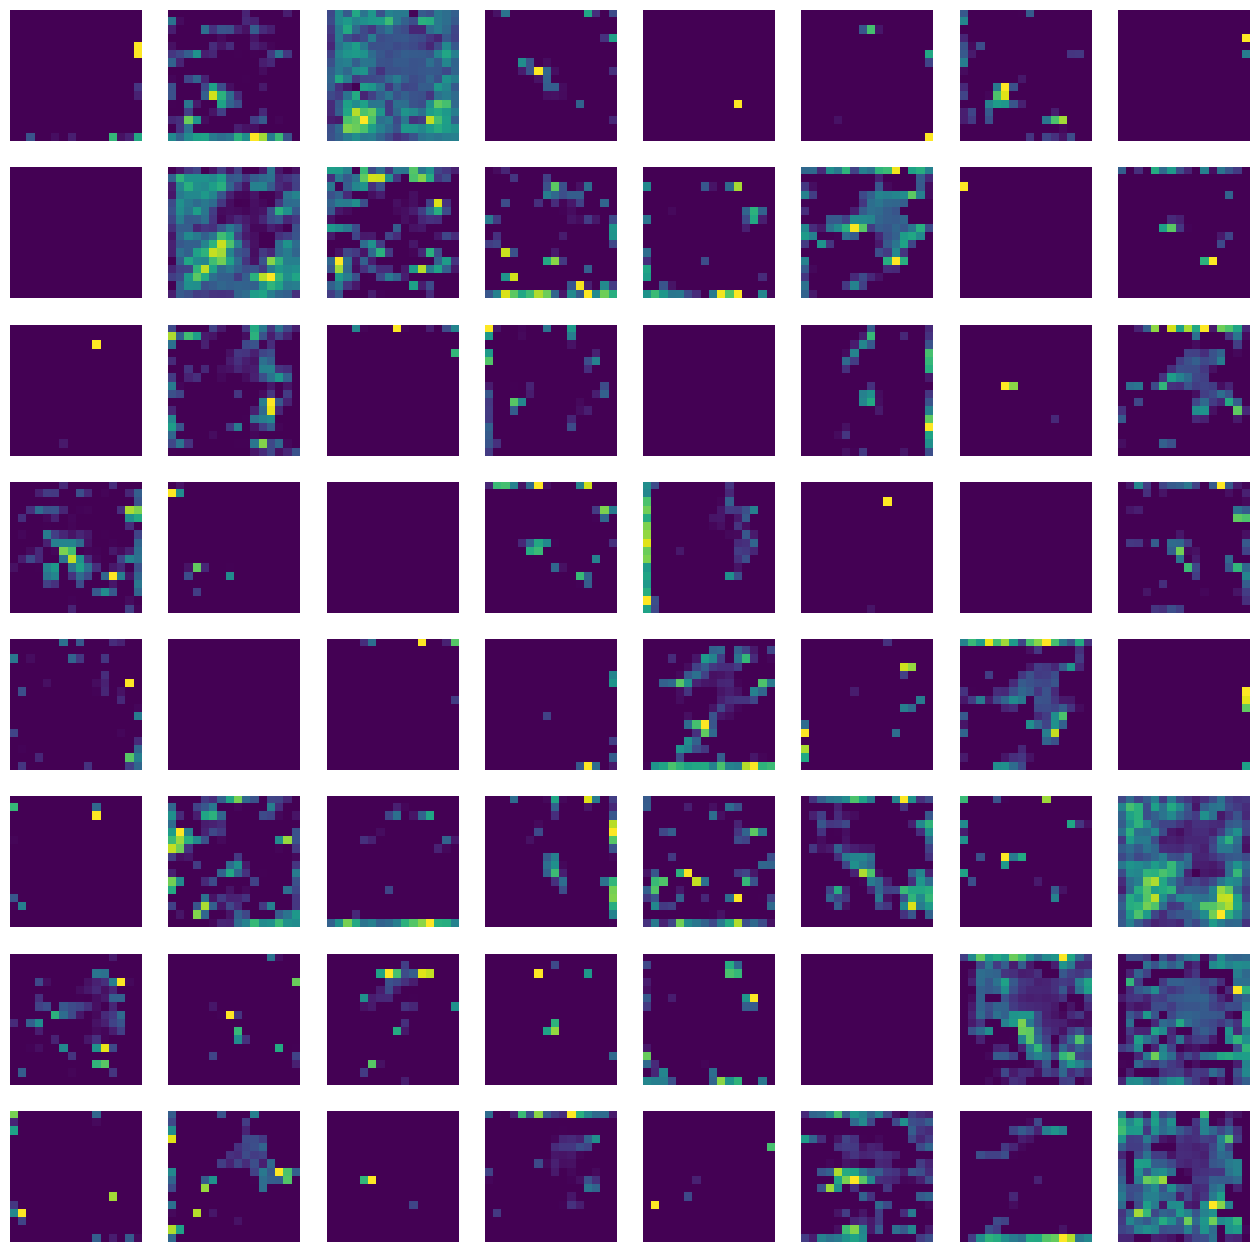

Layer Name: batch_normalization_2 — Feature Map Size: (1, 16, 16, 64)


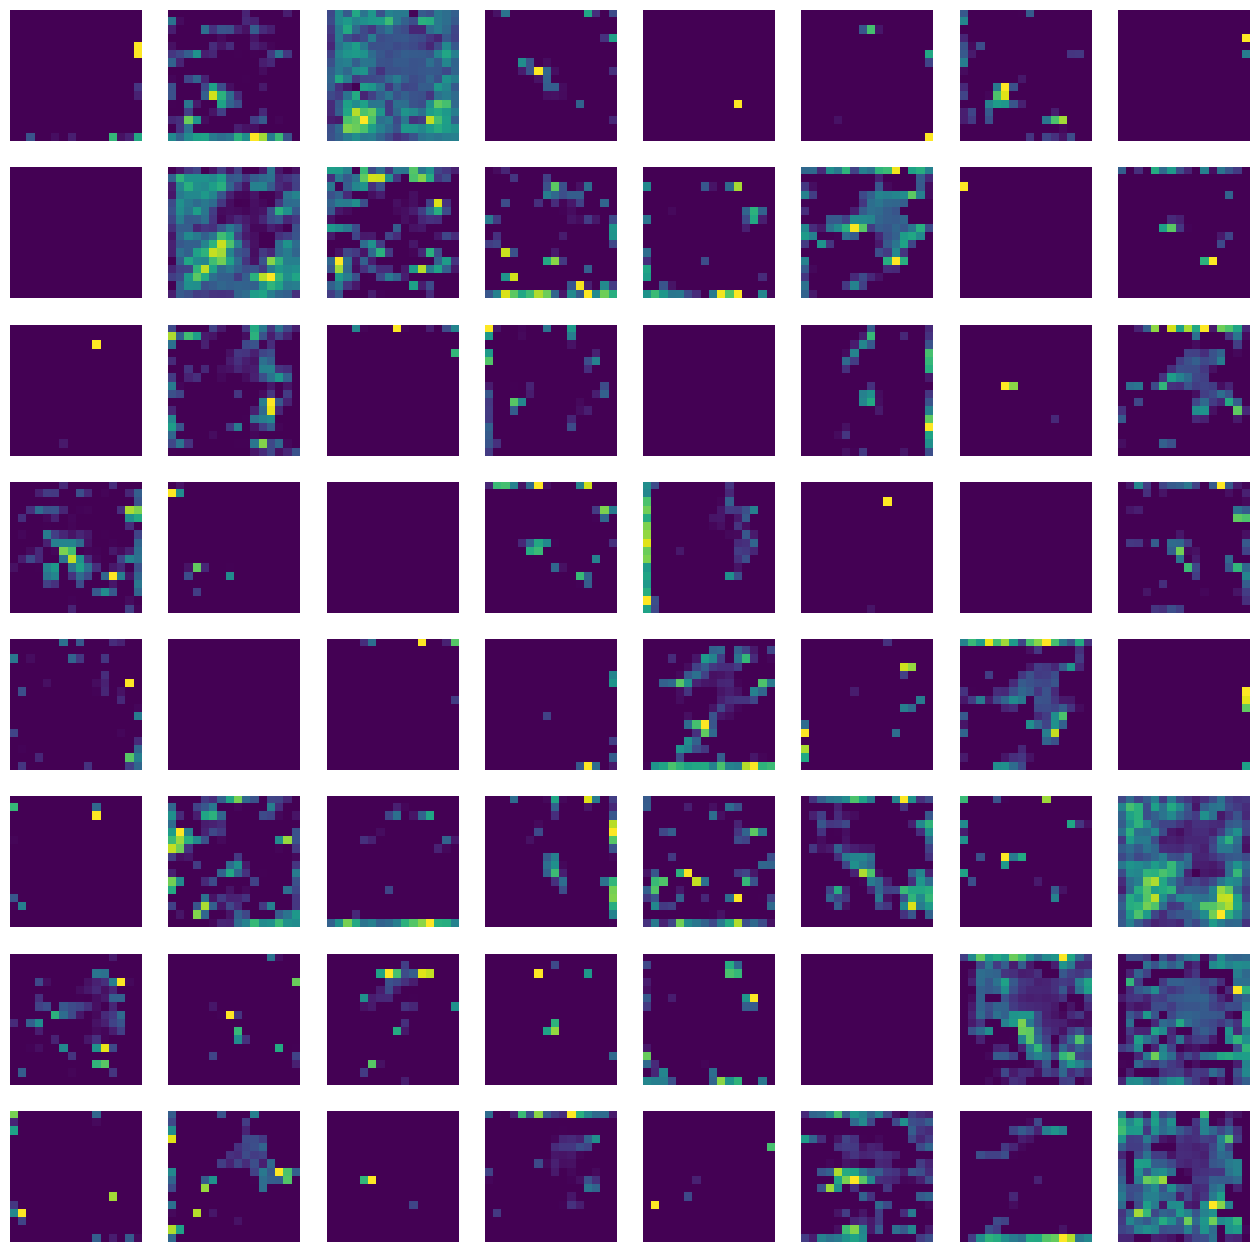

Layer Name: conv2d_3 — Feature Map Size: (1, 16, 16, 64)


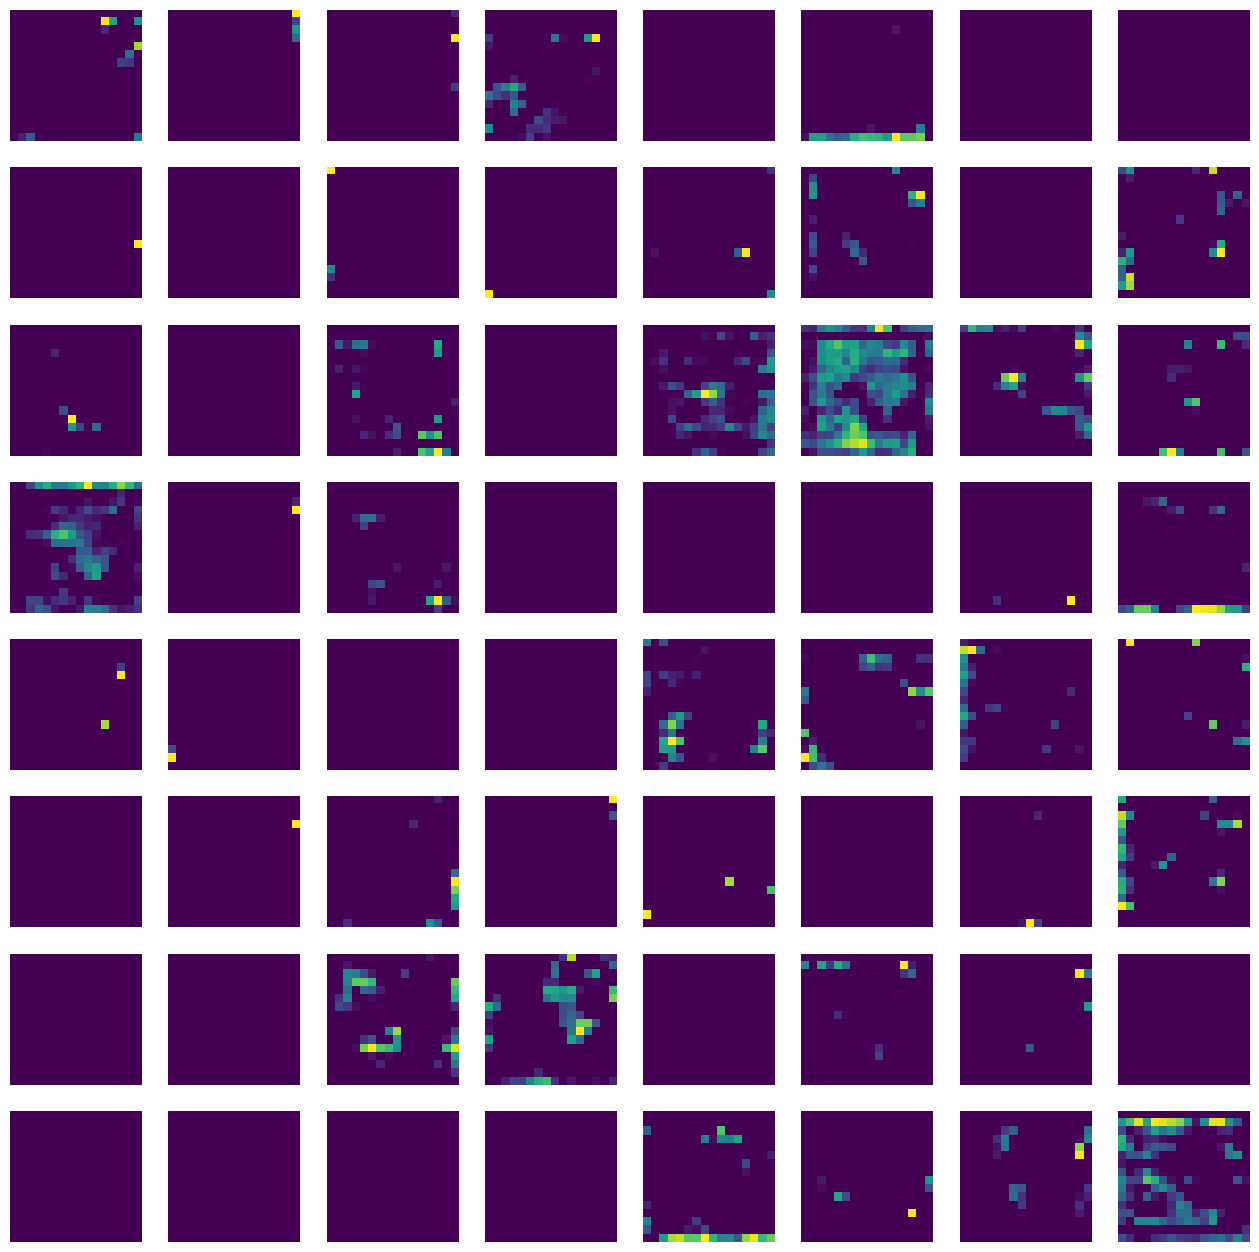

Layer Name: batch_normalization_3 — Feature Map Size: (1, 16, 16, 64)


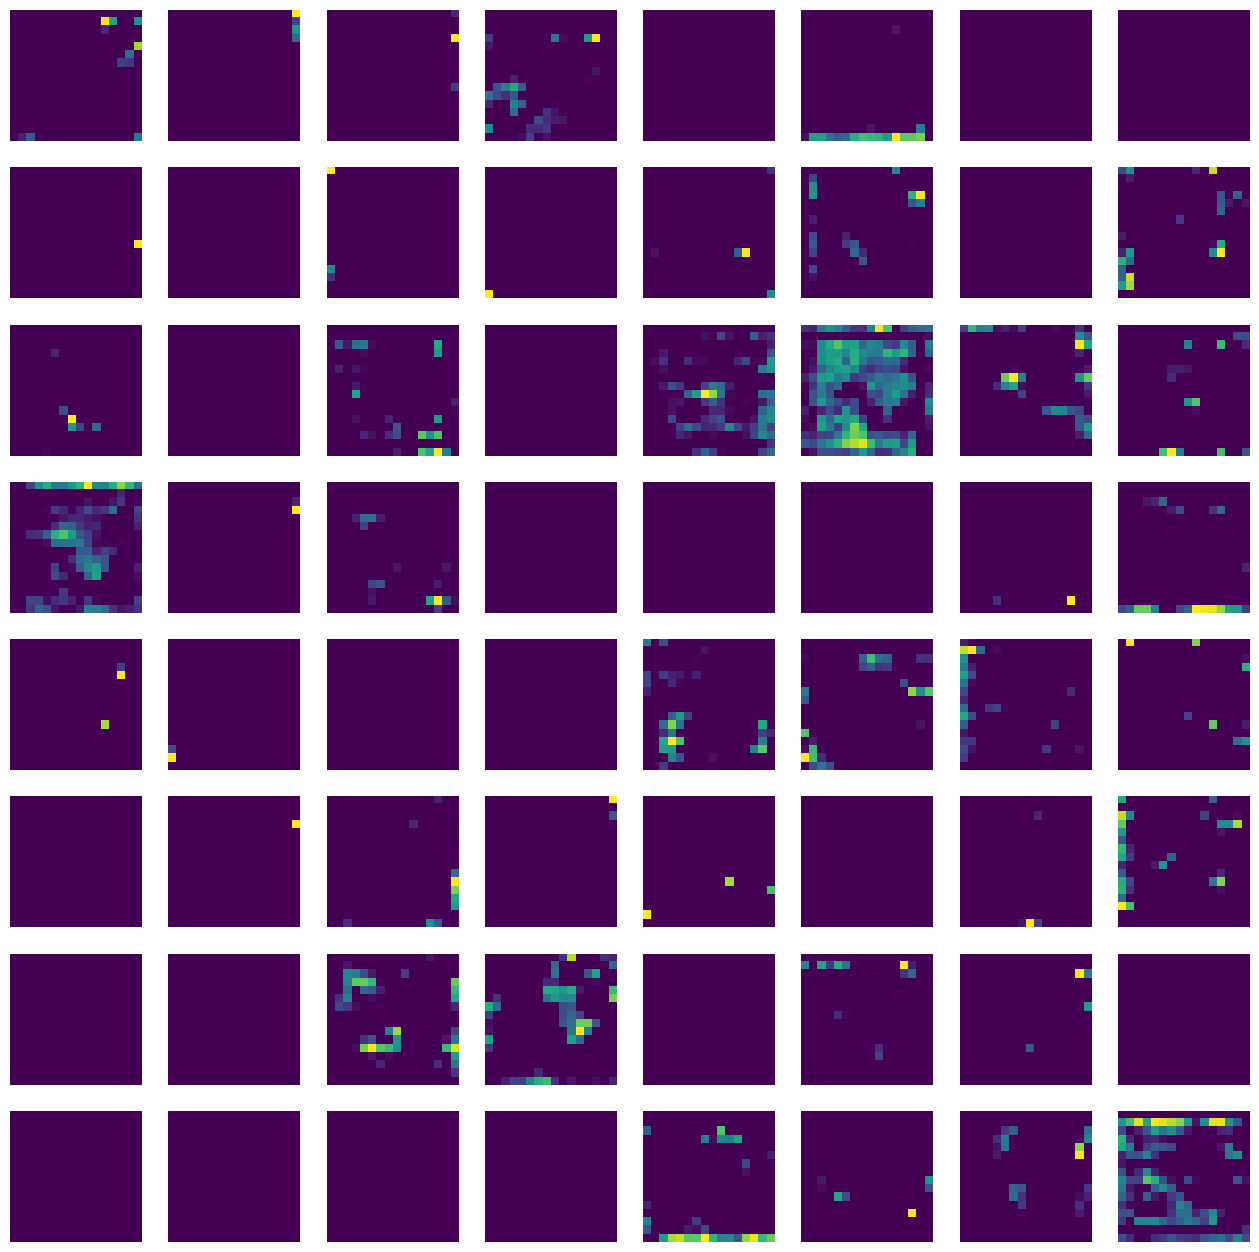

Layer Name: max_pooling2d_1 — Feature Map Size: (1, 8, 8, 64)


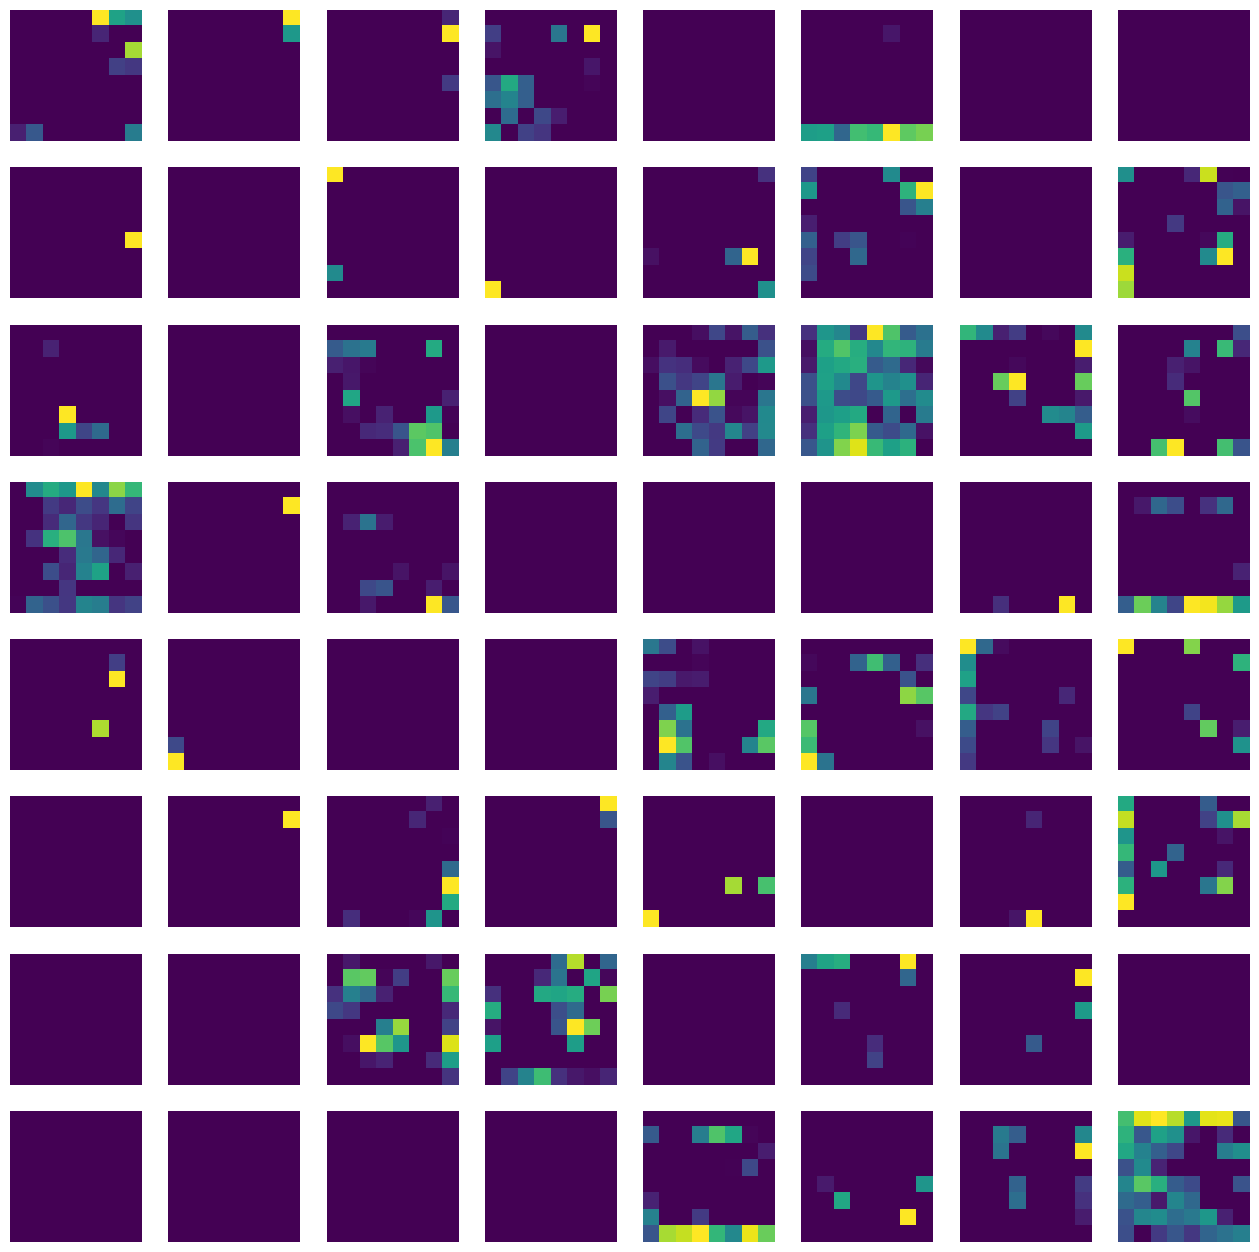

Layer Name: dropout_1 — Feature Map Size: (1, 8, 8, 64)


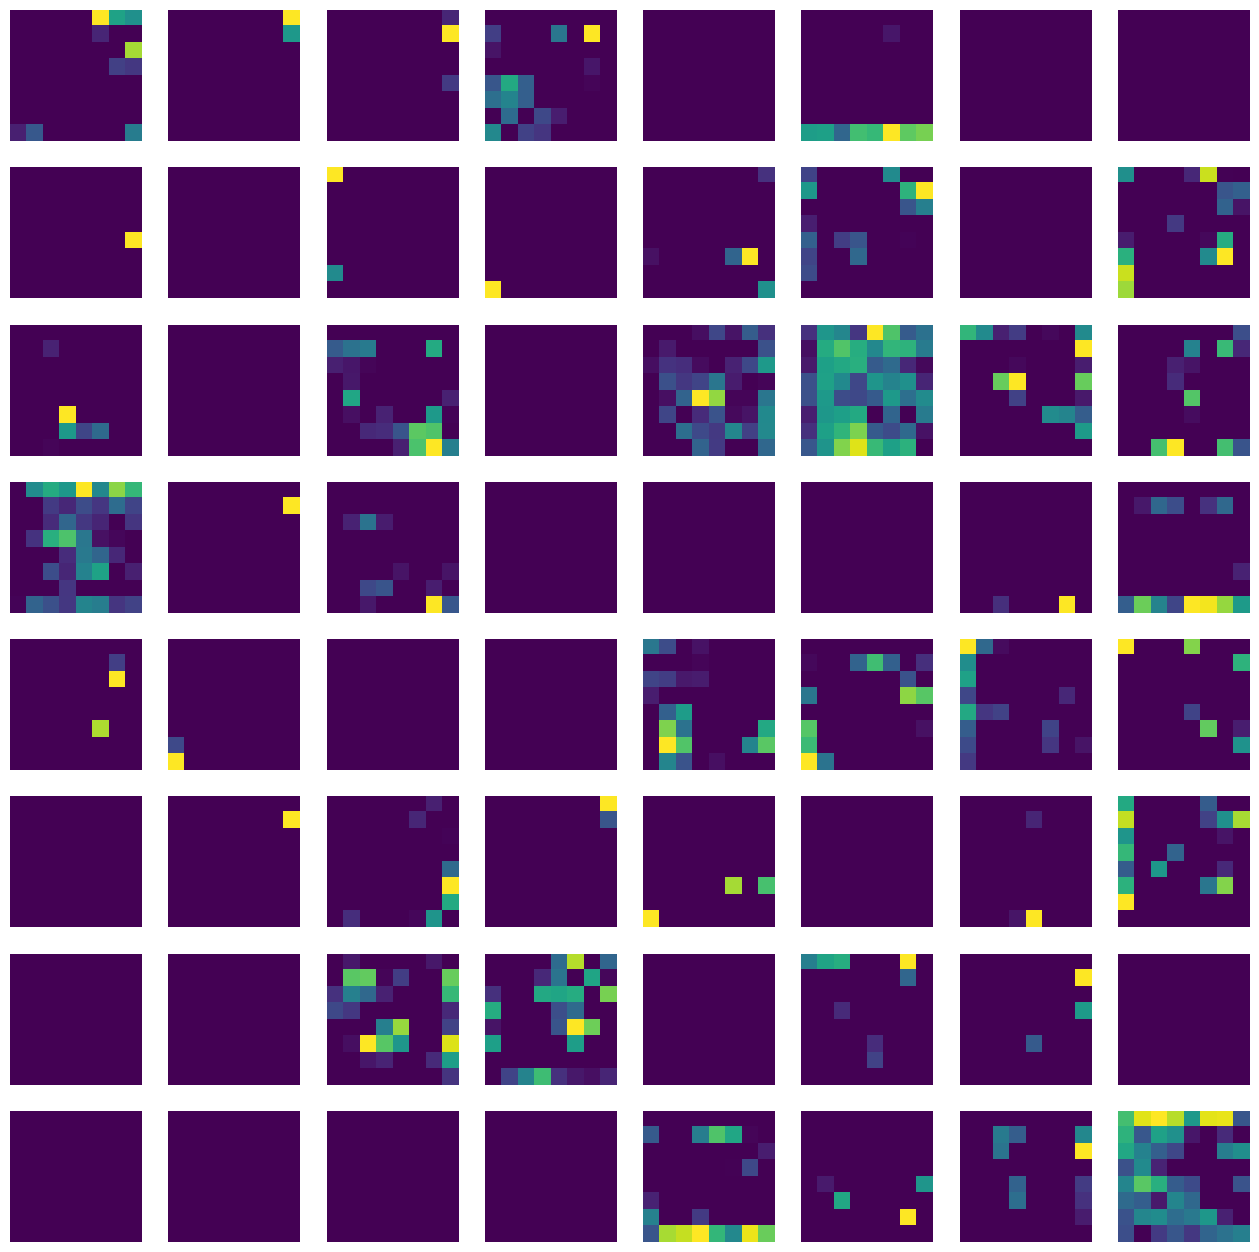

Layer Name: flatten — Feature Map Size: (1, 4096)


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

Error in callback <function _draw_all_if_interactive at 0x7c4ec8550ee0> (for post_execute):


ValueError: Image size of 1600x102400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1600x102400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x102400 with 4096 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to visualize feature maps at every layer for a given image
def visualize_all_feature_maps(input_image):
    # Create a model that outputs the feature maps for every layer
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'dense' not in layer.name]
    intermediate_model = Model(inputs=model.inputs, outputs=layer_outputs)

    # Get the feature maps for the input image
    feature_maps = intermediate_model.predict(np.expand_dims(input_image, axis=0))

    for layer_name, feature_map in zip([layer.name for layer in model.layers if 'conv' in layer.name or 'dense' not in layer.name], feature_maps):
        n_feature_maps = feature_map.shape[-1]  # Number of feature maps
        size = feature_map.shape[1]  # Size of the feature map

        # Define number of columns and rows for plotting
        n_columns = 8  # Number of columns for display
        n_rows = n_feature_maps // n_columns  # Number of rows

        # Plotting the feature maps
        print(f"Layer Name: {layer_name} — Feature Map Size: {feature_map.shape}")
        fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns * 2, n_rows * 2))

        # Loop through each feature map in the current layer
        for i in range(n_feature_maps):
            ax = axes[i // n_columns, i % n_columns]
            ax.imshow(feature_map[0, :, :, i], cmap='viridis')
            ax.axis('off')

        plt.show()

# Example usage: Visualize feature maps for every convolutional layer
test_image =resized_image  # Use a sample test image (or any image)
visualize_all_feature_maps(test_image)

[Reference-how to visualize Feature Maps and Filters in CNN](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)-Jason Brownlee.